<a href="https://colab.research.google.com/github/galav12/CSC442-Project/blob/main/Tanmay_Kapse_Homework7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Colab File Upload

In [3]:
!git clone https://github.com/galav12/CSC442-Project.git

Cloning into 'CSC442-Project'...
remote: Enumerating objects: 65, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 65 (delta 27), reused 25 (delta 7), pack-reused 0 (from 0)
Receiving objects: 100% (65/65), 30.51 MiB | 16.90 MiB/s, done.
Resolving deltas: 100% (27/27), done.


In [4]:
%cd CSC442-Project/
!ls

/content/CSC442-Project
'CSC442 Dataset Report (1).pdf'   Pratyush_Joshi_Homework_6.ipynb
 data				  README.md
 dataset_cleaner.ipynb		  Tanmay_Kapse_Homework6.ipynb
'Homework 6 - GS.ipynb'		  teamnotes


## Cleaning Pollution Dataset

In [5]:
pollution_full = pd.read_csv("data/Pollution.zip", compression="zip")
pollution_full.shape

(1746661, 29)

In [6]:
pollution = pollution_full[(pollution_full["Date Local"].str[:4] <=  "2015") & (pollution_full["Date Local"].str[:4] >=  "2011") & (pollution_full["State"] != "District Of Columbia")]
pollution = pollution[["State","Date Local","NO2 Mean","NO2 1st Max Value","NO2 AQI","O3 Mean","O3 1st Max Value","O3 AQI","SO2 Mean","SO2 1st Max Value","SO2 AQI","CO Mean","CO 1st Max Value","CO AQI"]]
pollution["Year"] = pollution["Date Local"].str[:4]
pollution['Year'] = pollution['Year'].astype(int)
pollution = pollution.drop(columns=["Date Local"])
print(pollution.shape)

(640025, 14)


In [7]:
pollution["NO2 AQI"] = pollution["NO2 AQI"].astype(np.float64)
pollution["O3 AQI"] = pollution["O3 AQI"].astype(np.float64)
pollution.info()


<class 'pandas.core.frame.DataFrame'>
Index: 640025 entries, 1072382 to 1722056
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   State              640025 non-null  object 
 1   NO2 Mean           640025 non-null  float64
 2   NO2 1st Max Value  640025 non-null  float64
 3   NO2 AQI            640025 non-null  float64
 4   O3 Mean            640025 non-null  float64
 5   O3 1st Max Value   640025 non-null  float64
 6   O3 AQI             640025 non-null  float64
 7   SO2 Mean           640025 non-null  float64
 8   SO2 1st Max Value  640025 non-null  float64
 9   SO2 AQI            320210 non-null  float64
 10  CO Mean            640025 non-null  float64
 11  CO 1st Max Value   640025 non-null  float64
 12  CO AQI             319955 non-null  float64
 13  Year               640025 non-null  int64  
dtypes: float64(12), int64(1), object(1)
memory usage: 73.2+ MB


In [8]:
# Aggregating pollution by state and year
pollution_no_outliers = pollution.copy()
for col in pollution_no_outliers.columns[1:]:
        pollution_no_outliers = pollution_no_outliers[(pollution_no_outliers[col] >= pollution_no_outliers[col].quantile(0.05)) & (pollution_no_outliers[col] <= pollution_no_outliers[col].quantile(0.95))]

pollution_state = pollution_no_outliers.groupby(["State","Year"]).aggregate('mean').reset_index()
pollution_state.shape

(188, 14)

In [ ]:
# pollution_state.to_csv("data/pollution_clean.csv",index=False)

## Cleaning Heart Disease Dataset

In [9]:
heart_full = pd.read_csv("data/Heart_Disease.zip", compression="zip")
heart_full.shape

<ipython-input-9-1f9cd1d613a9>:1: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  heart_full = pd.read_csv("data/Heart_Disease.zip", compression="zip")


(85800, 29)

In [10]:
heart = heart_full[["Year","LocationDesc","Category","Topic","Data_Value_Type","Data_Value","Break_Out_Category","Break_out"]]
heart = heart.pivot_table(index=["Year", "LocationDesc", "Category", "Topic", "Break_Out_Category", "Break_out"], columns="Data_Value_Type", values="Data_Value").reset_index()
heart = heart.drop(columns=["Age-Standardized"])
heart = heart.pivot_table(index=["Year","LocationDesc","Category","Topic"], columns=["Break_Out_Category", "Break_out"], values="Crude").reset_index()

heart.columns = (col[0]+'_'+col[1] if col[1] != '' else col[0] for col in heart.columns)

heart.shape

(2556, 19)

In [11]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     2556 non-null   int64  
 1   LocationDesc             2556 non-null   object 
 2   Category                 2556 non-null   object 
 3   Topic                    2556 non-null   object 
 4   Age_18-24                846 non-null    float64
 5   Age_20-24                322 non-null    float64
 6   Age_25-44                2114 non-null   float64
 7   Age_35+                  2556 non-null   float64
 8   Age_45-64                2556 non-null   float64
 9   Age_65+                  2556 non-null   float64
 10  Age_75+                  2551 non-null   float64
 11  Gender_Female            2556 non-null   float64
 12  Gender_Male              2556 non-null   float64
 13  Overall_Overall          2556 non-null   float64
 14  Race_Hispanic           

In [ ]:
# heart.to_csv("data/heart_clean.csv",index=False)

## Merging Dataset

In [12]:
merged = pd.merge(heart, pollution_state, left_on=["LocationDesc","Year"], right_on=["State","Year"], how="left")

In [13]:
merged = merged[merged["State"].notna()]
merged = merged.drop(columns=["State"])
merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1841 entries, 22 to 2555
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     1841 non-null   int64  
 1   LocationDesc             1841 non-null   object 
 2   Category                 1841 non-null   object 
 3   Topic                    1841 non-null   object 
 4   Age_18-24                595 non-null    float64
 5   Age_20-24                237 non-null    float64
 6   Age_25-44                1525 non-null   float64
 7   Age_35+                  1841 non-null   float64
 8   Age_45-64                1841 non-null   float64
 9   Age_65+                  1841 non-null   float64
 10  Age_75+                  1837 non-null   float64
 11  Gender_Female            1841 non-null   float64
 12  Gender_Male              1841 non-null   float64
 13  Overall_Overall          1841 non-null   float64
 14  Race_Hispanic            130

In [ ]:
# merged.to_csv("data/merged.csv",index=False)

## Outliers

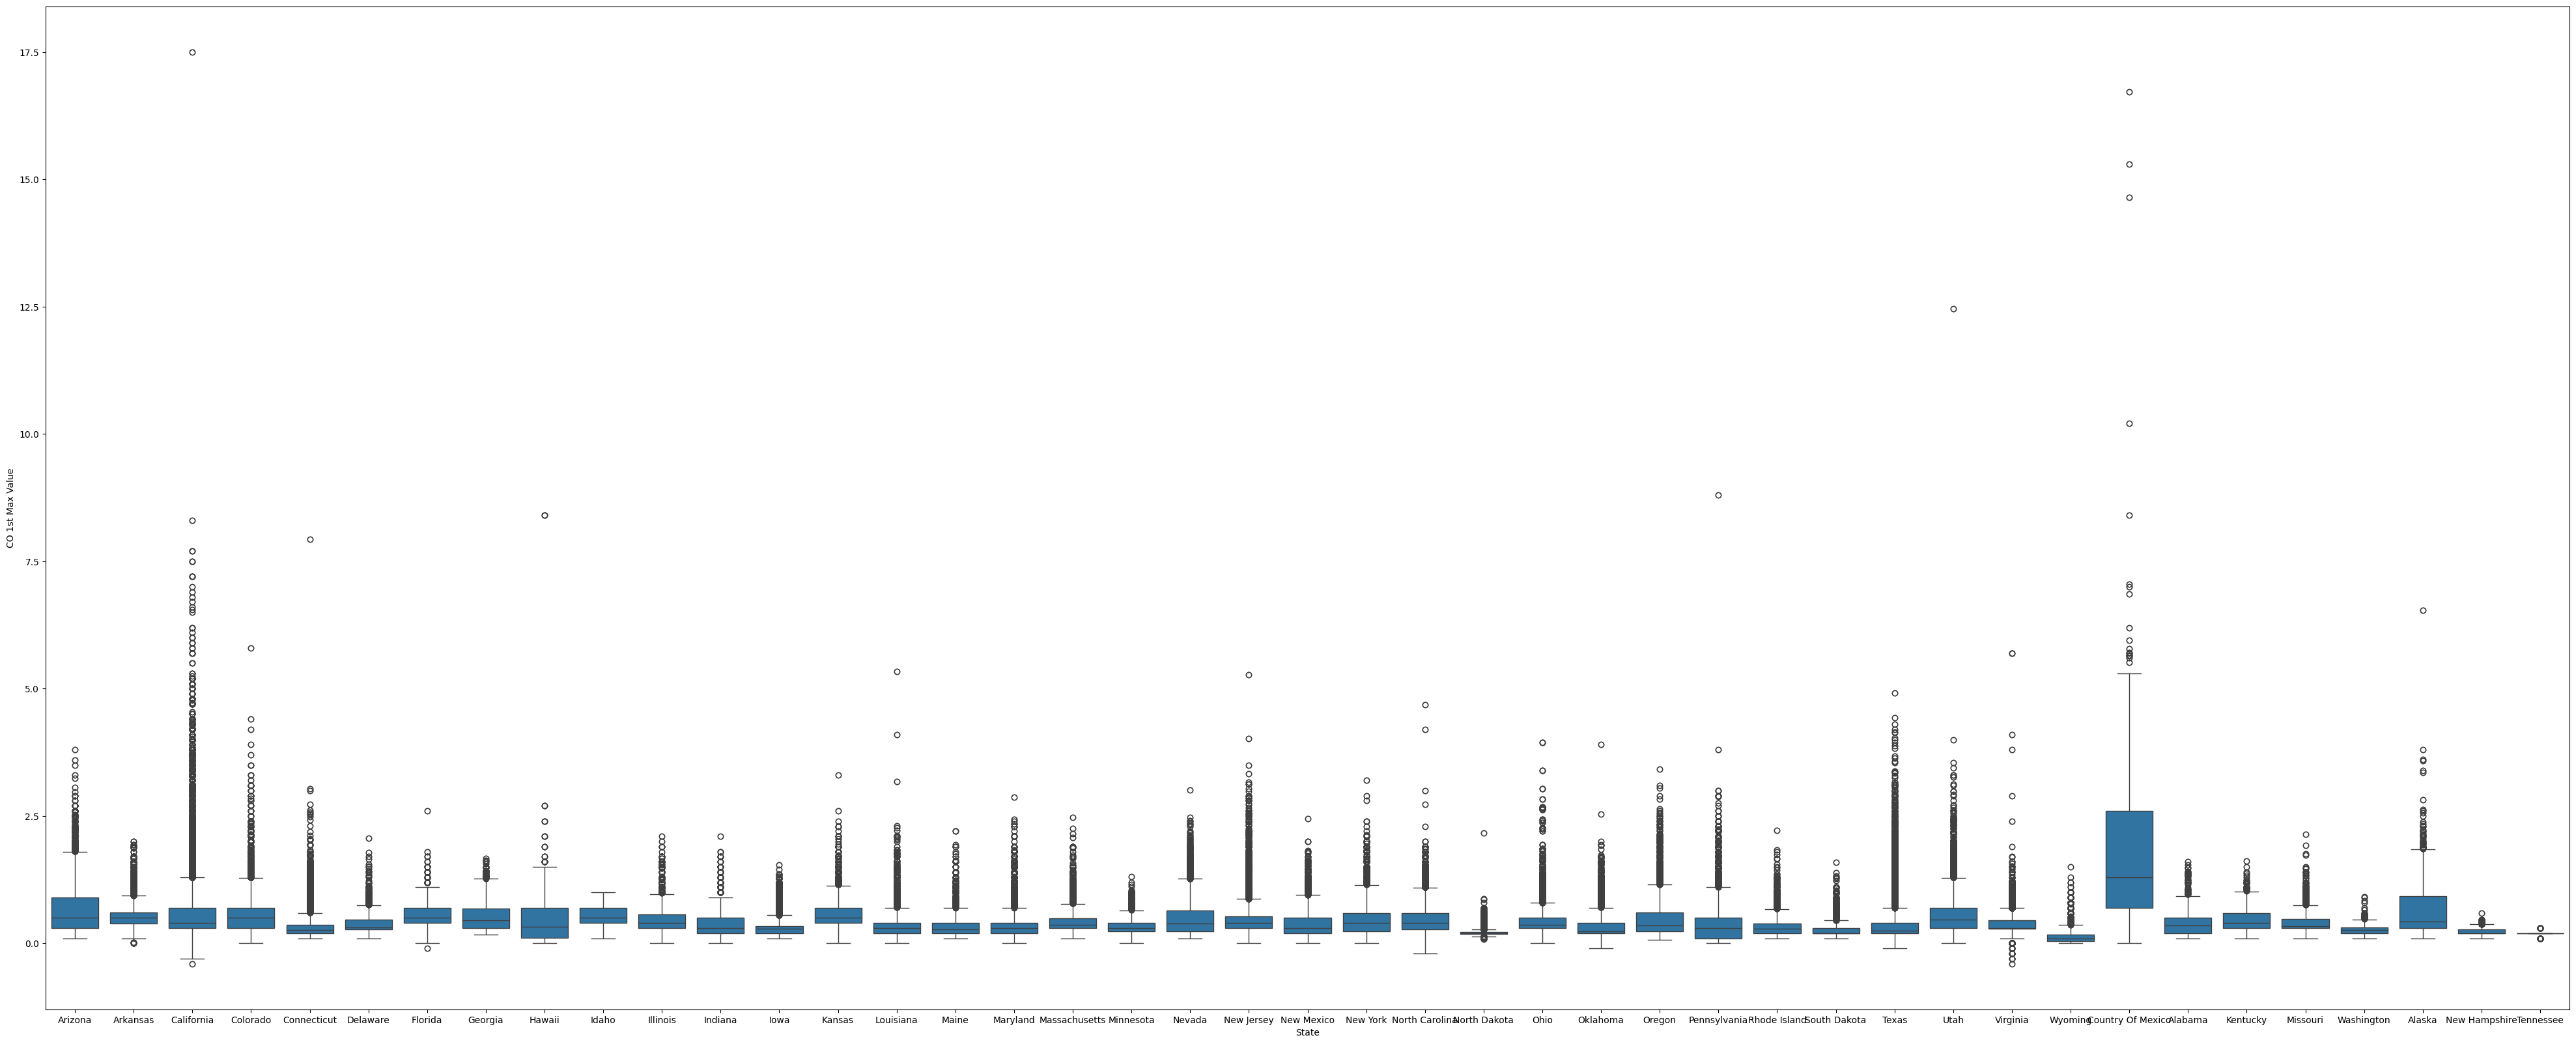

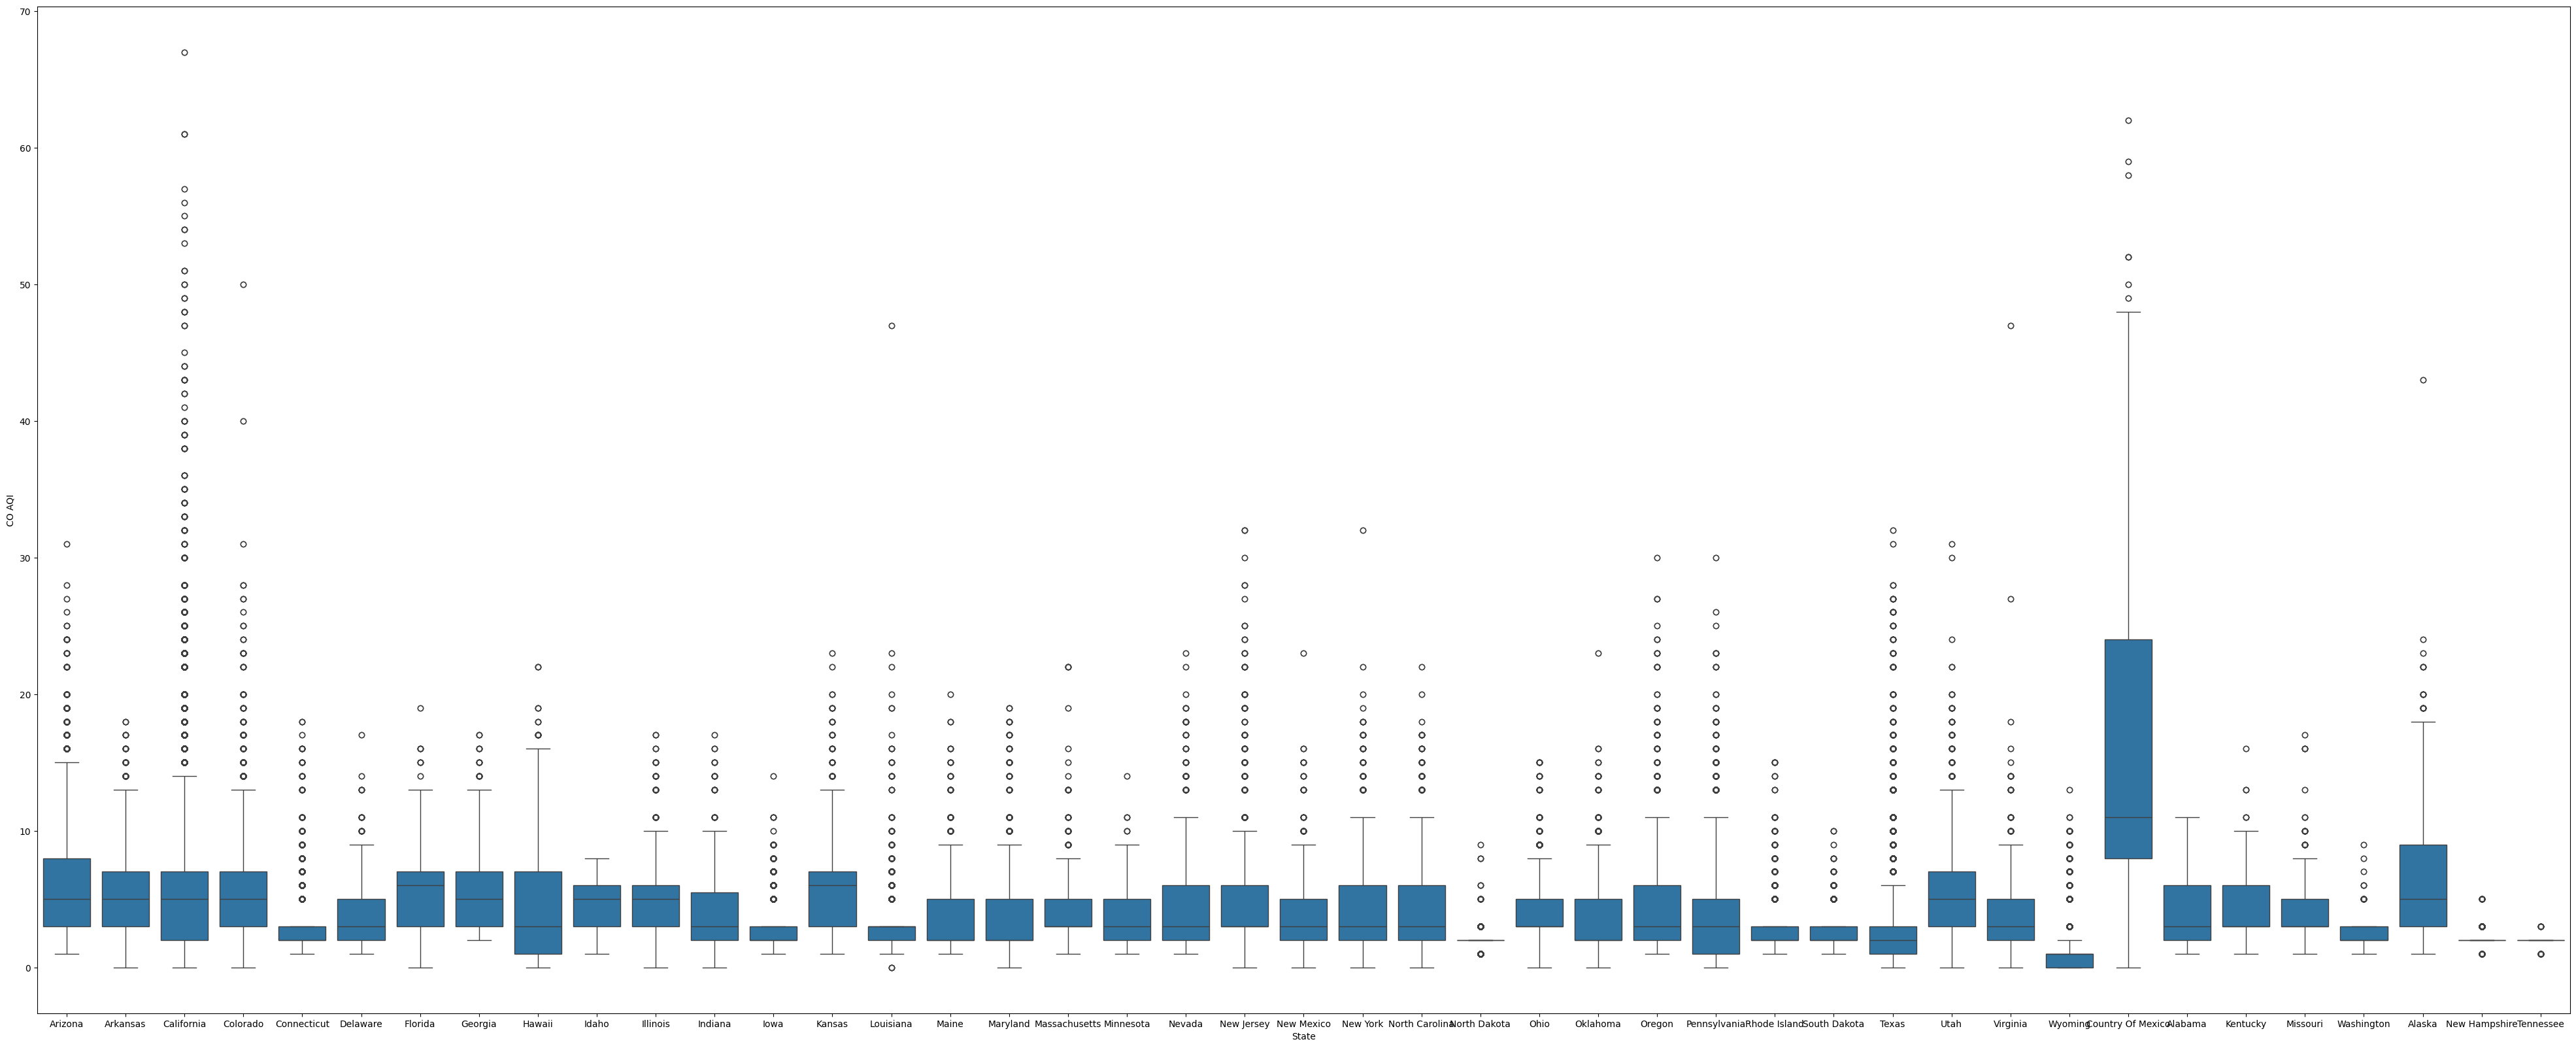

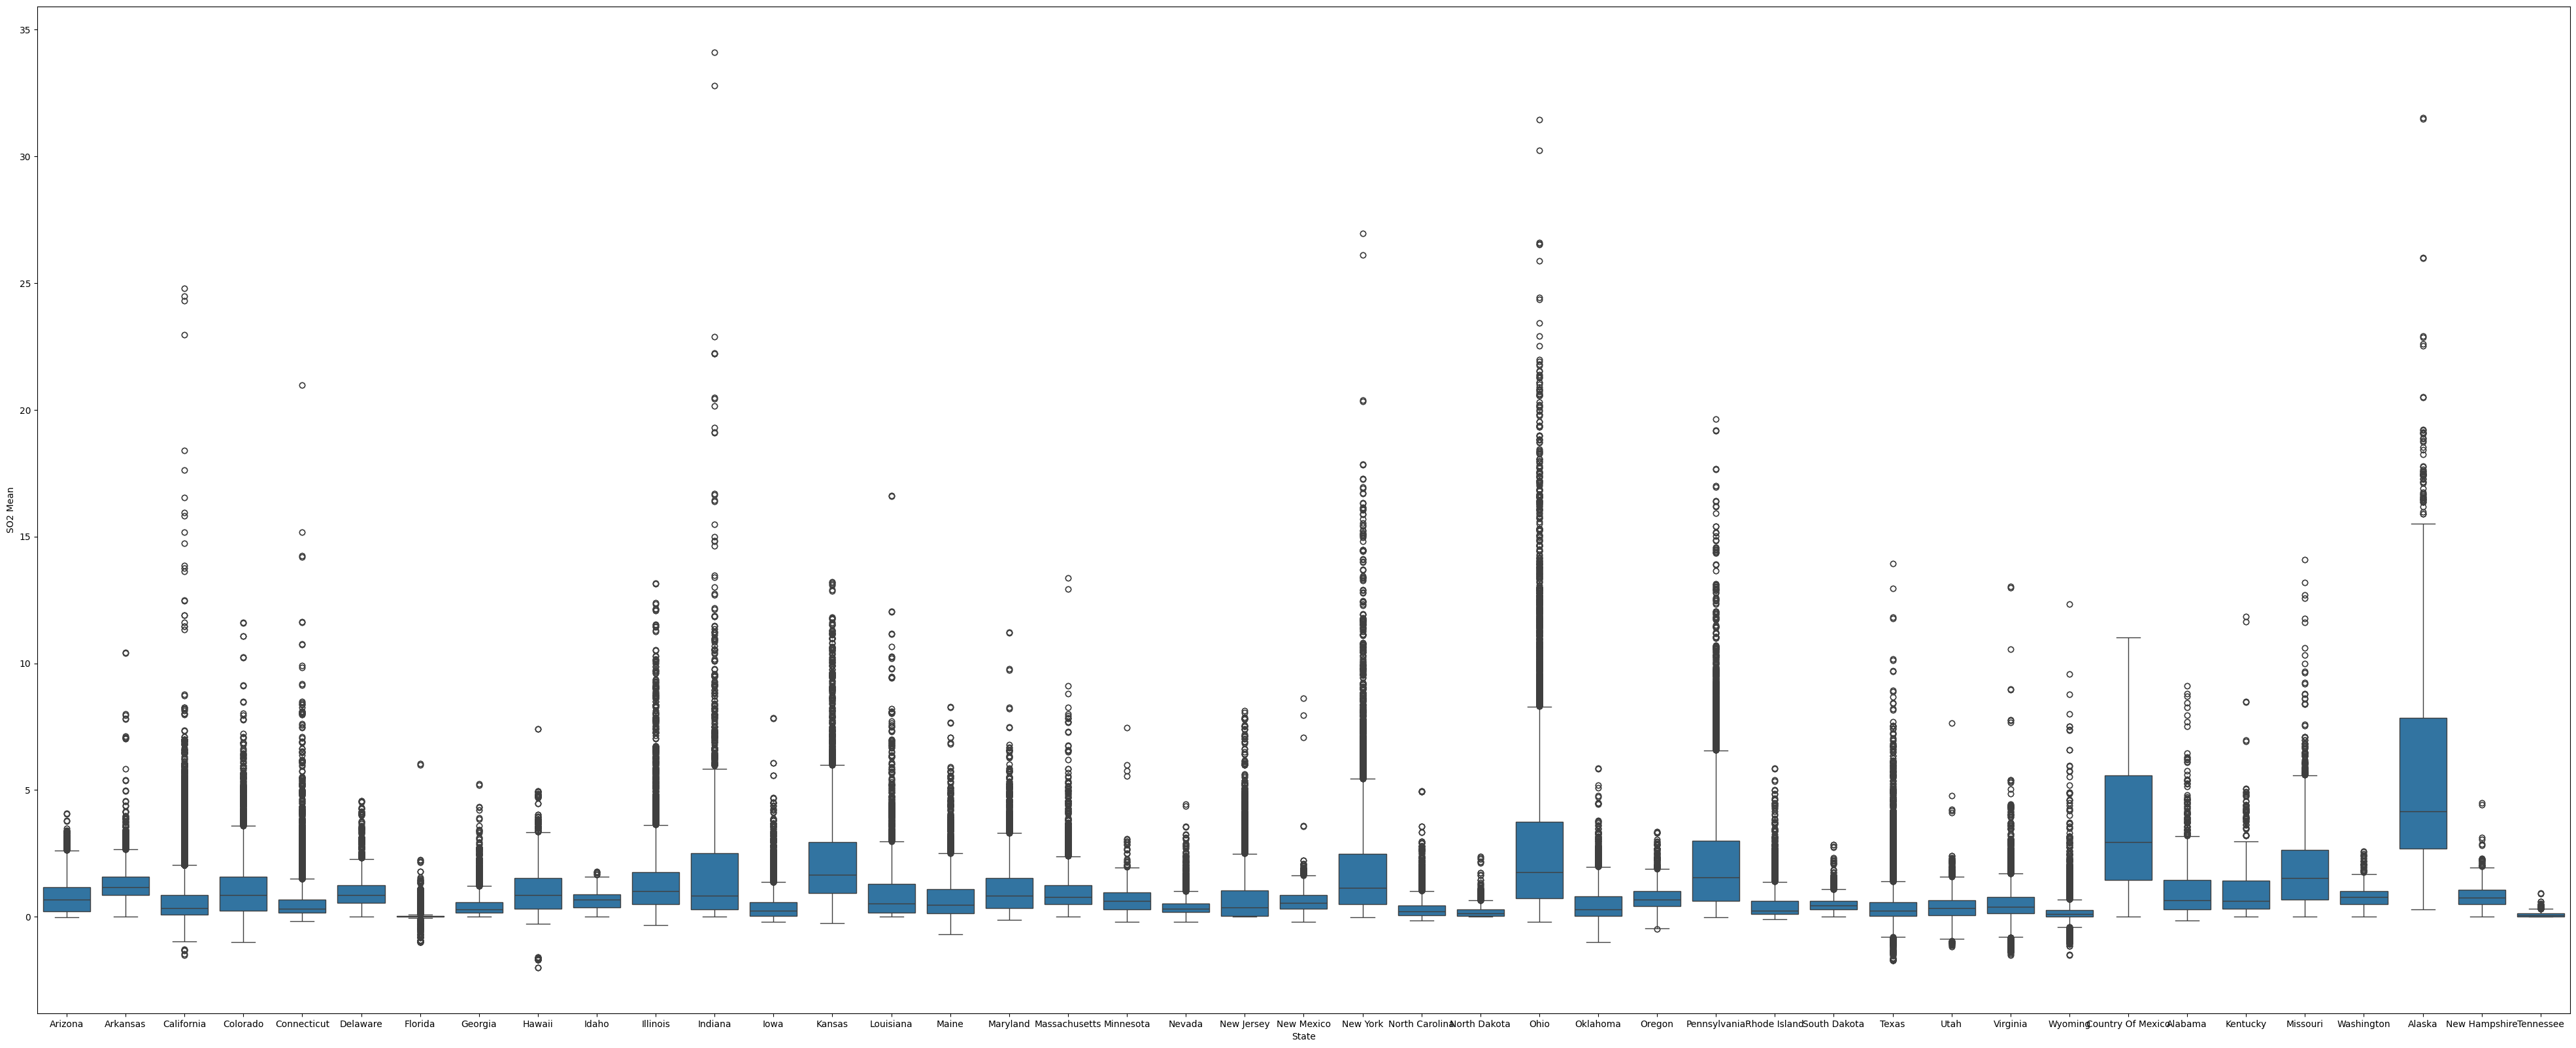

In [14]:
plt.figure(figsize=(50,20))
sns.boxplot(x=pollution["State"], y=pollution['CO 1st Max Value'])
plt.show()
plt.figure(figsize=(50,20))
sns.boxplot(x=pollution["State"], y=pollution['CO AQI'])
plt.show()
plt.figure(figsize=(50,20))
sns.boxplot(x=pollution["State"], y=pollution['SO2 Mean'])
plt.show()

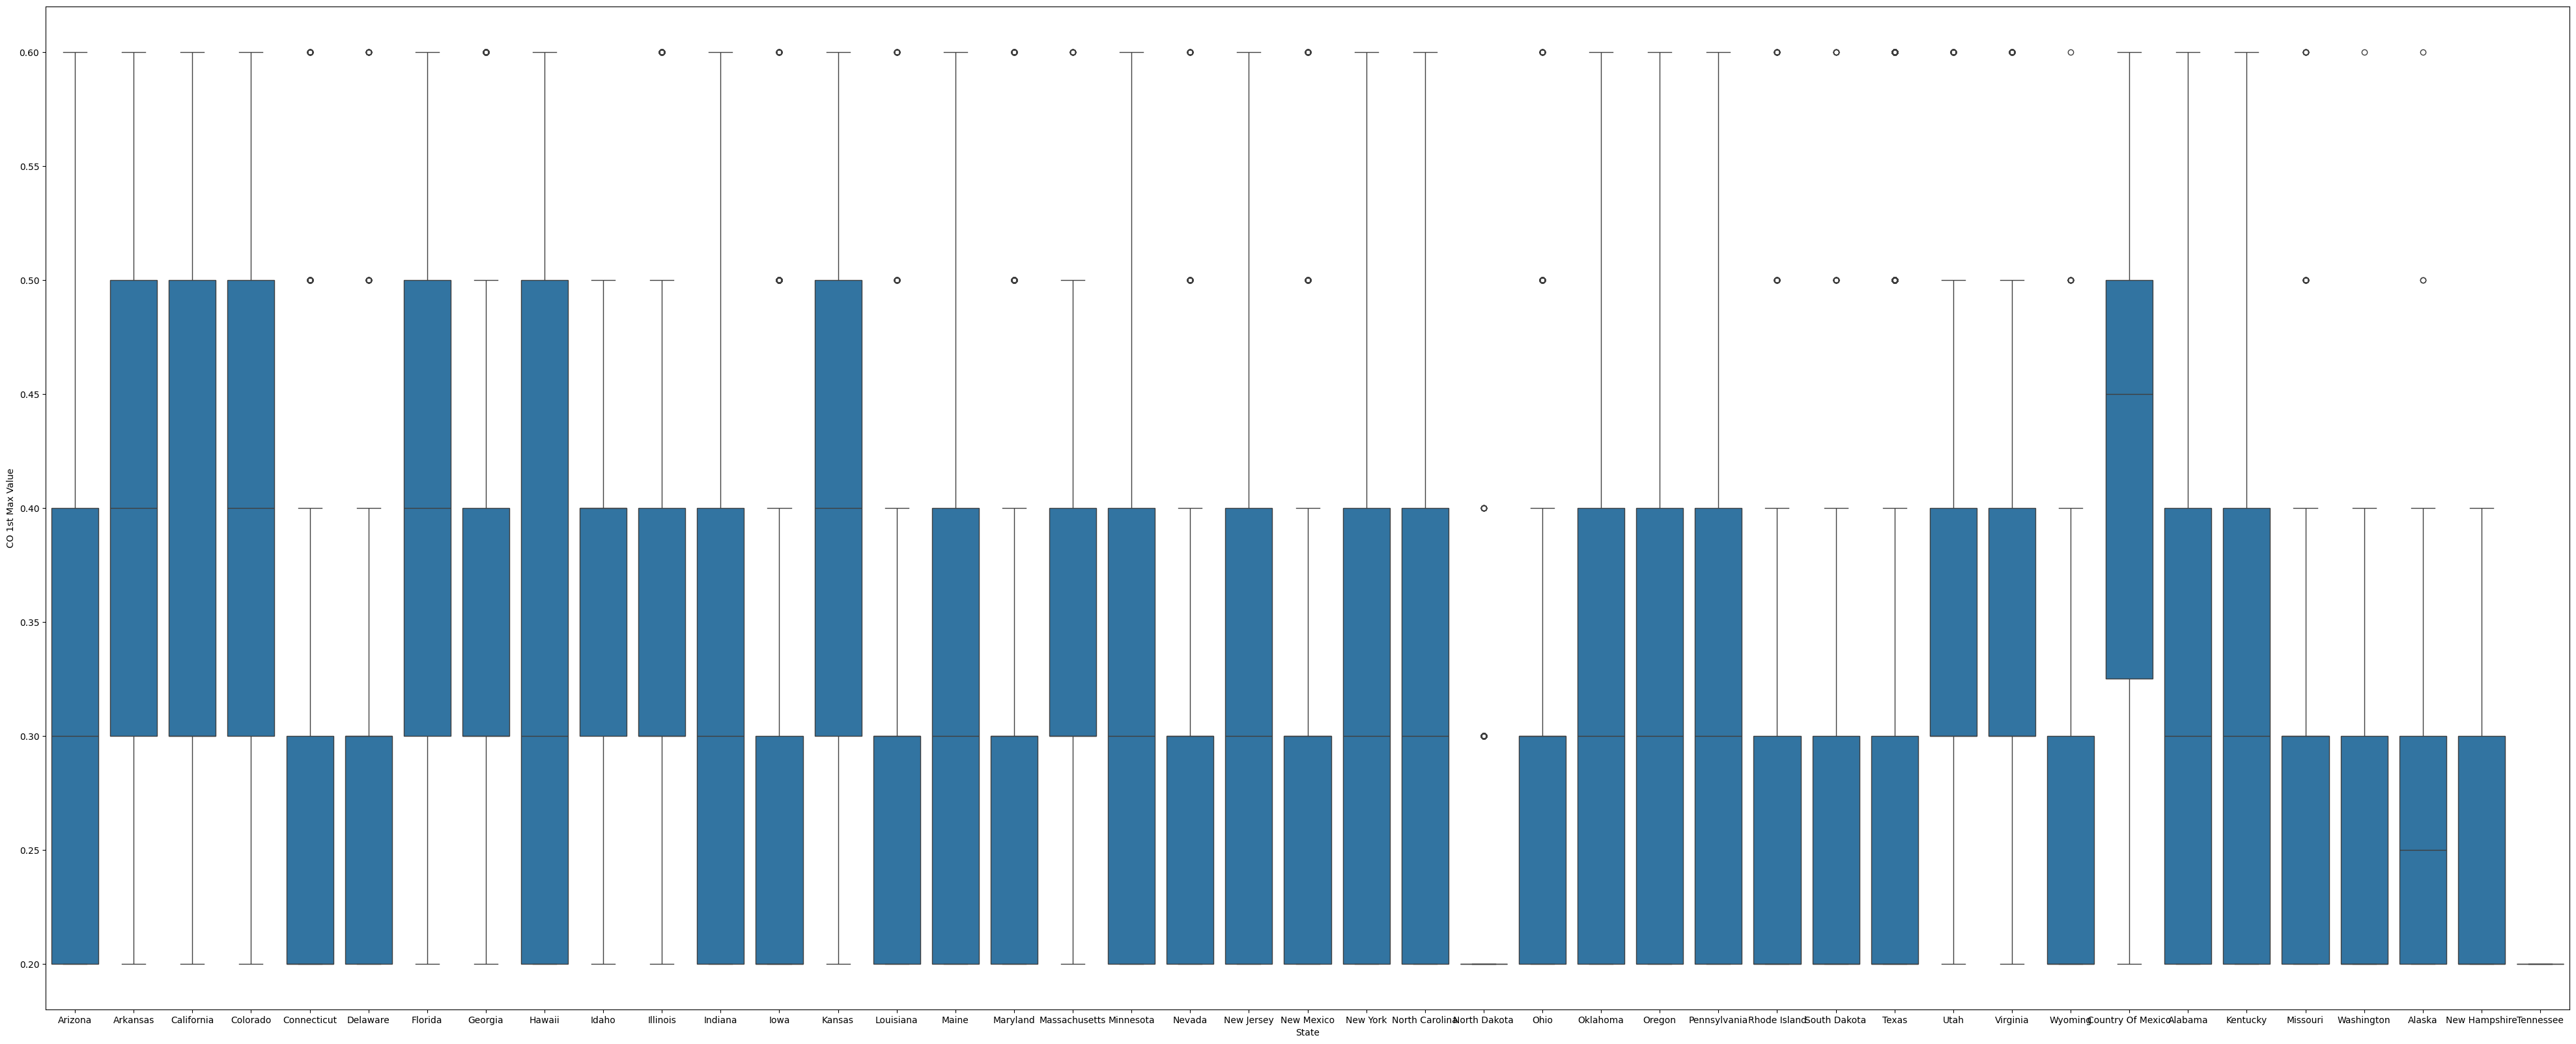

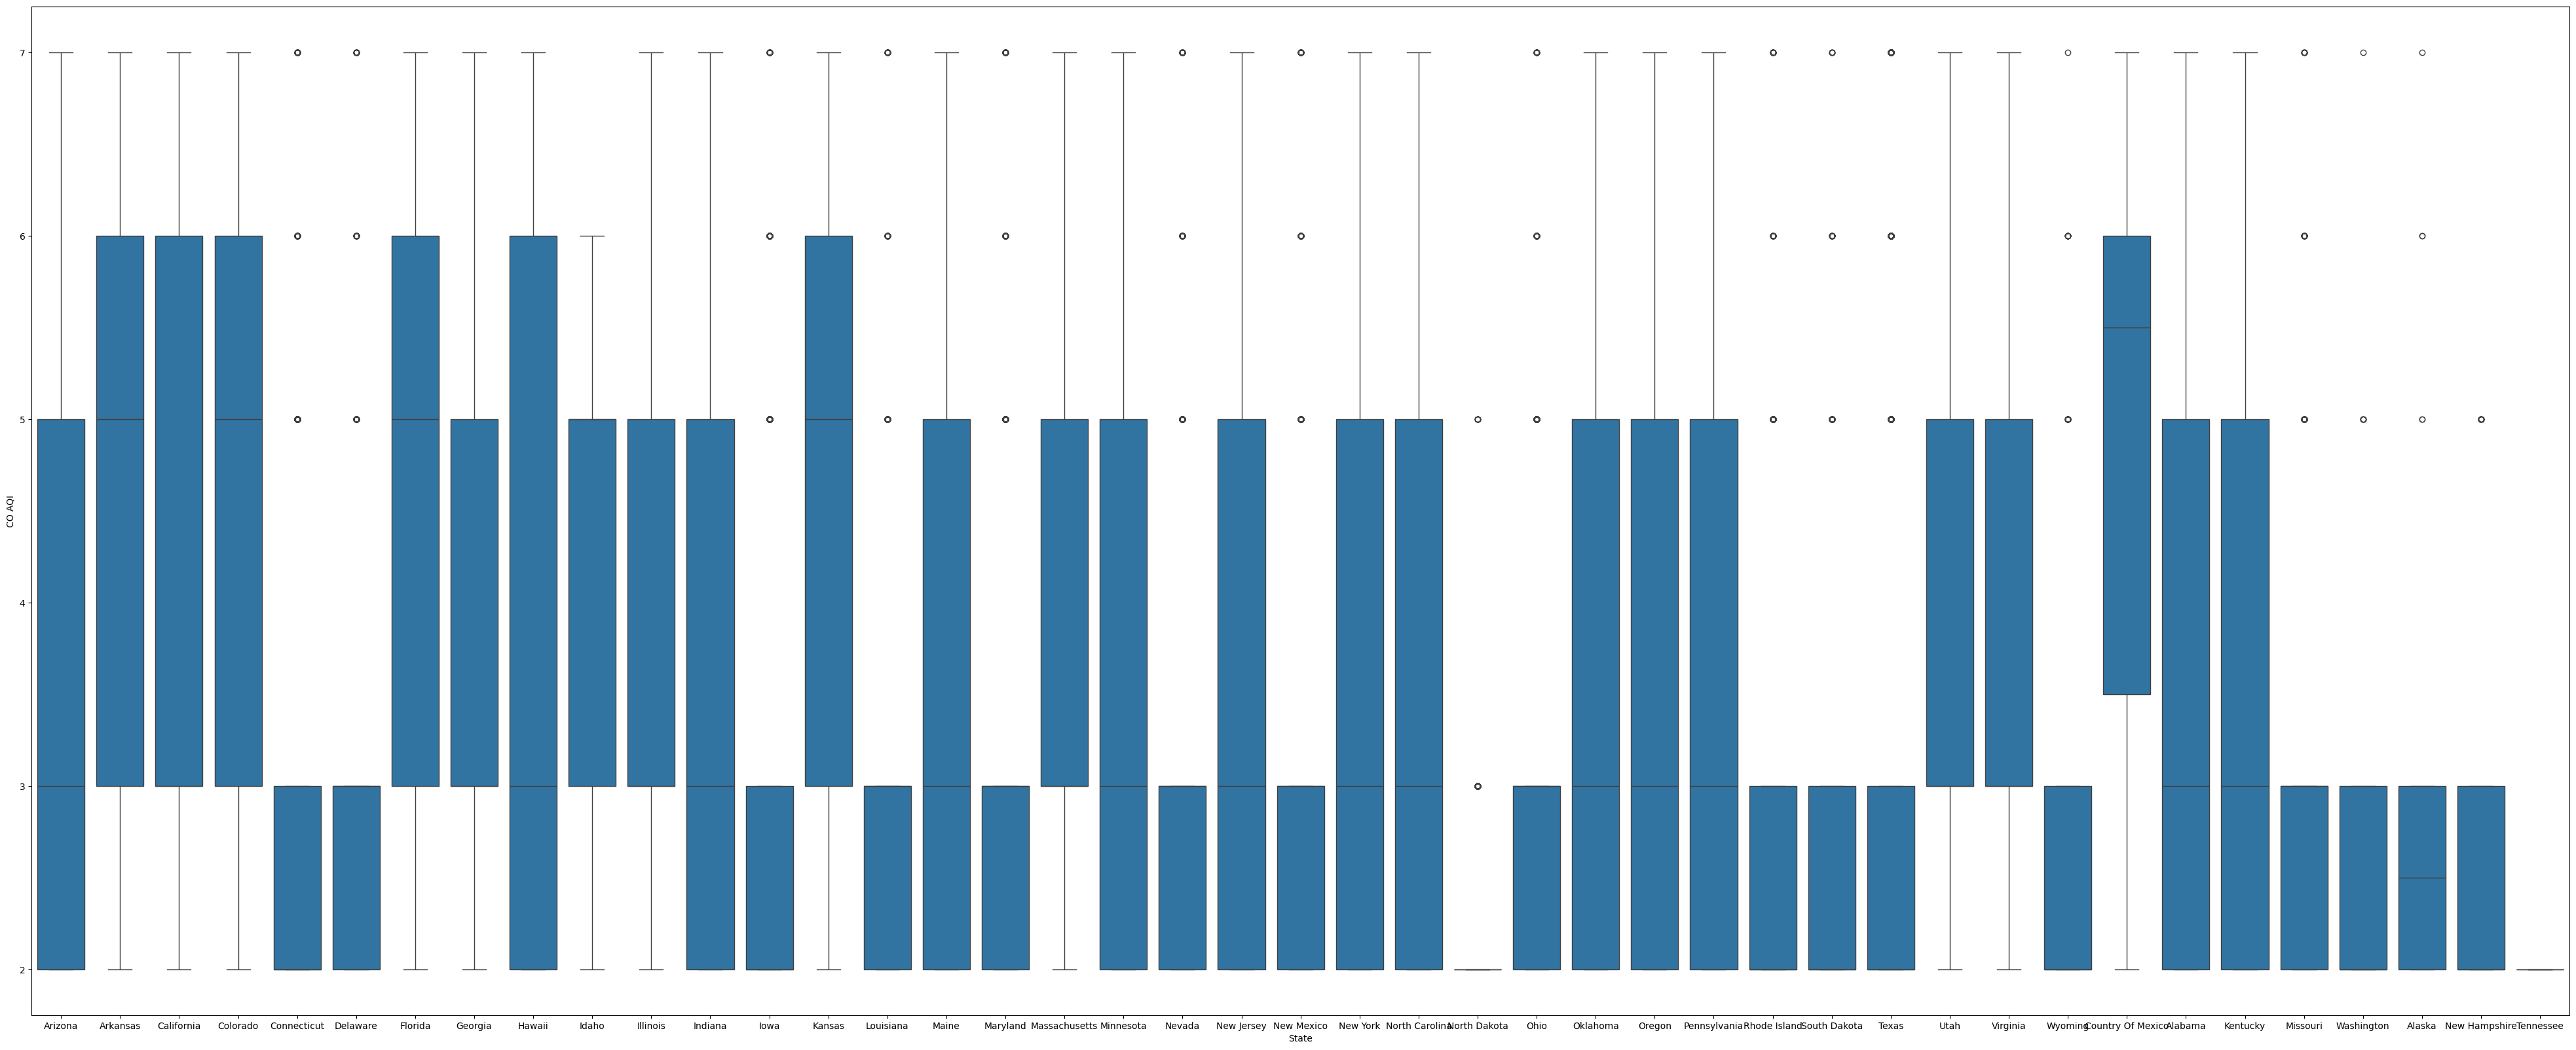

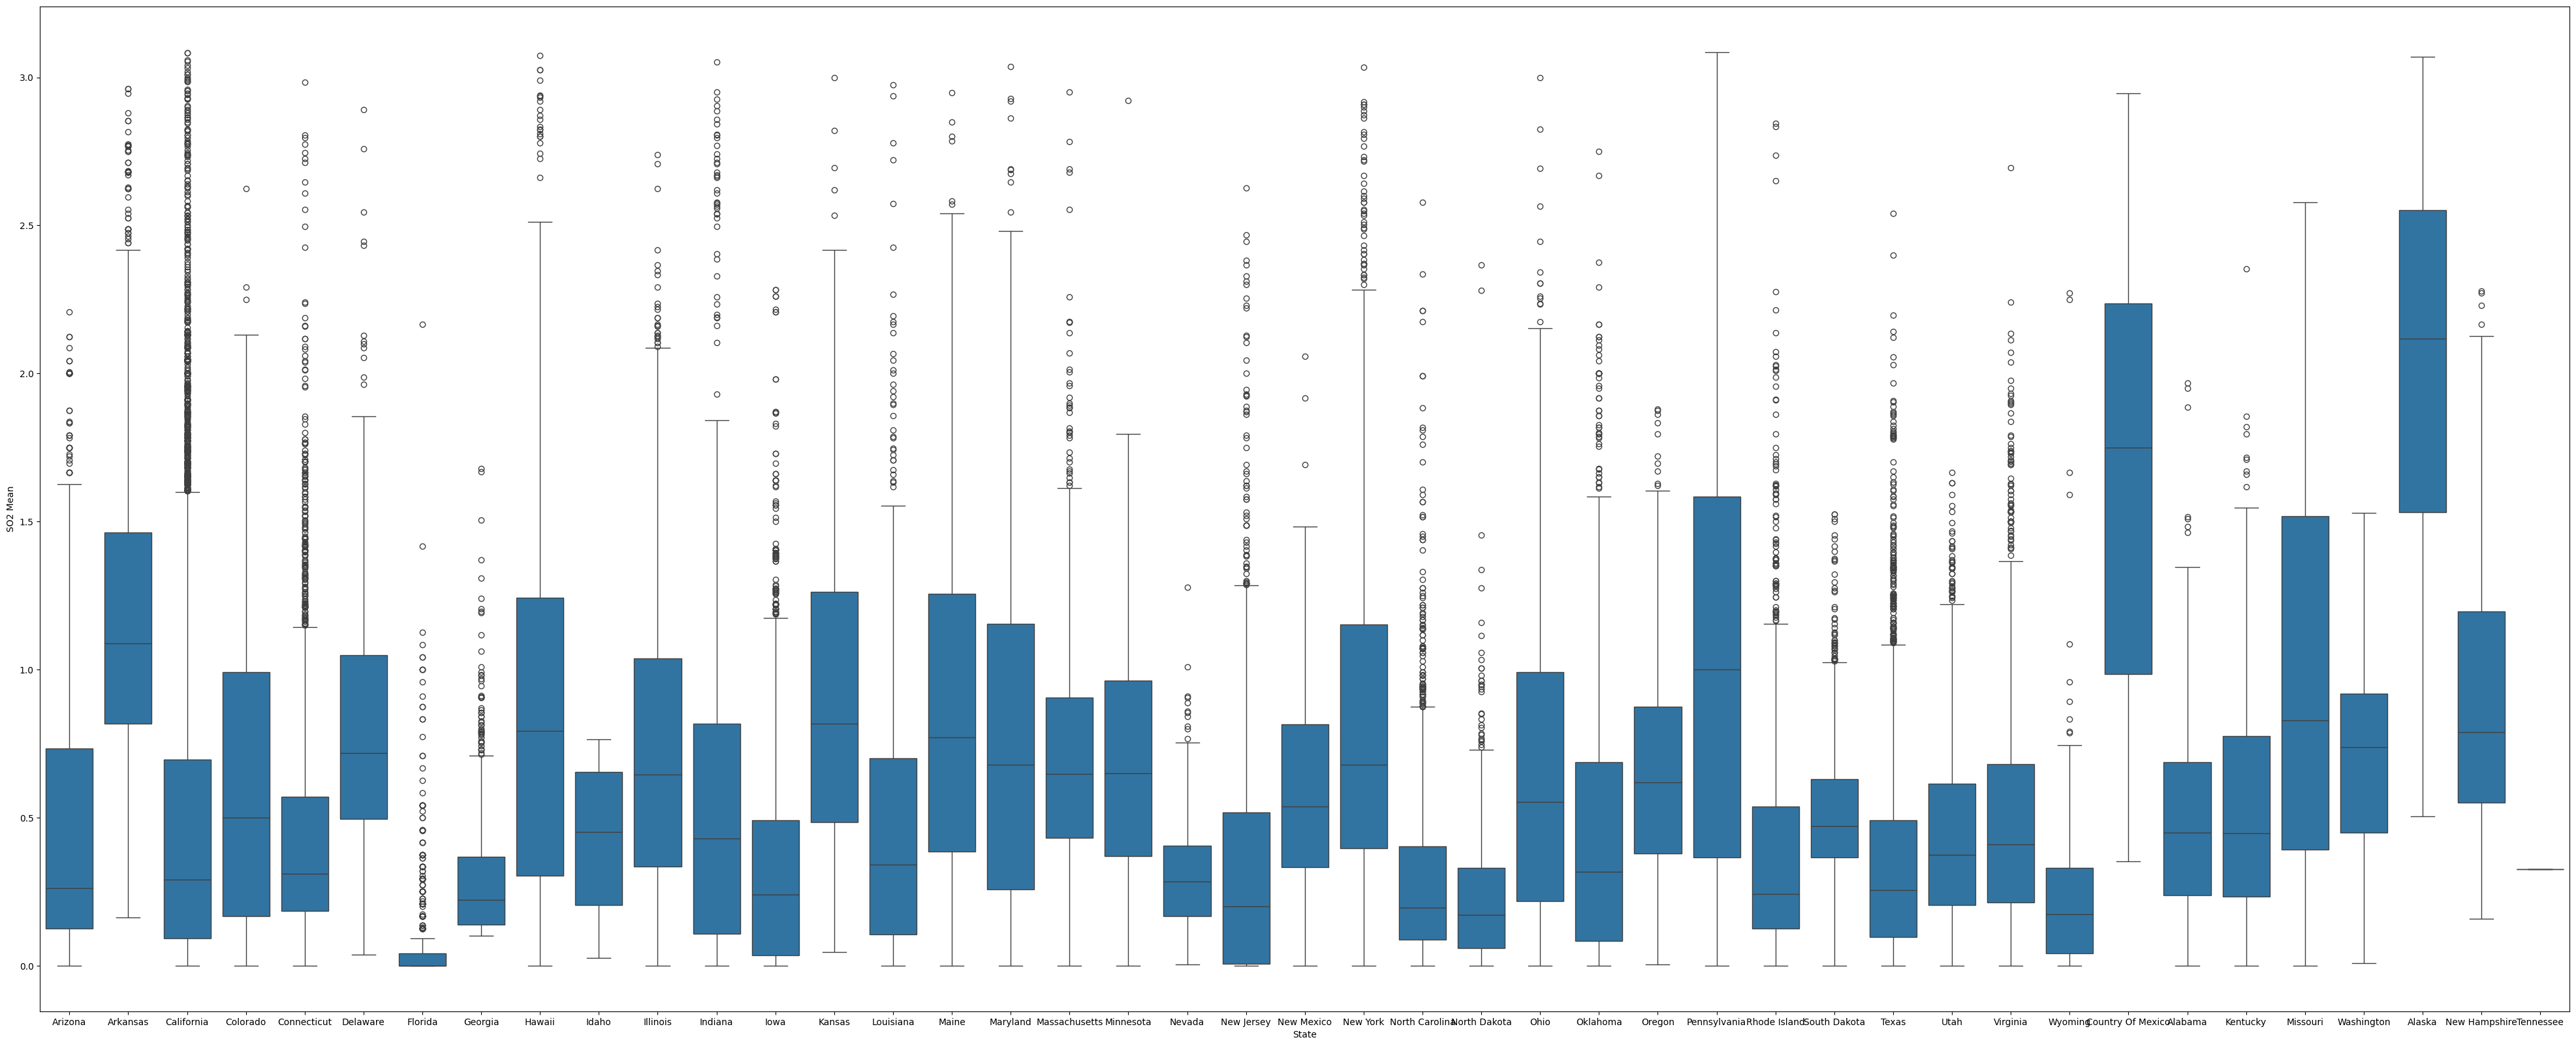

In [15]:
plt.figure(figsize=(50,20))
sns.boxplot(x=pollution_no_outliers["State"], y=pollution_no_outliers['CO 1st Max Value'])
plt.show()
plt.figure(figsize=(50,20))
sns.boxplot(x=pollution_no_outliers["State"], y=pollution_no_outliers['CO AQI'])
plt.show()
plt.figure(figsize=(50,20))
sns.boxplot(x=pollution_no_outliers["State"], y=pollution_no_outliers['SO2 Mean'])
plt.show()

## Querying

In [ ]:
# I will be querying rows based on Disease type or Risk Factor, and will be including percentages in Gender, Age and Race Columns.

In [16]:
import time


newDF = pd.read_csv('/content/merged_data_short.csv')

start_time = time.time()

query = newDF[newDF["Category"].isin (["Cardiovascular Diseases", "Risk Factors"])] [["Year", "Category", "Topic", "Gender-Female", "Gender-Male", "Age-18-24", "Age-25-44", "Age-45-64", "Age-65+", "Age-75+","Race-Hispanic", "Race-Non-Hispanic White", "Race-Non-Hispanic Black", "Race-Other"]]
end_time = time.time()

print(query.head(2))
print("\nTotal Rows Returned:", len(query))
print("Query Execution Time:", round(end_time - start_time, 4), "seconds")

   Year                 Category                                       Topic  \
0  2011  Cardiovascular Diseases  Acute Myocardial Infarction (Heart Attack)   
1  2011  Cardiovascular Diseases                      Coronary Heart Disease   

   Gender-Female  Gender-Male  Age-18-24  Age-25-44  Age-45-64  Age-65+  \
0          14.15        20.25        NaN        NaN       14.9     24.5   
1           3.40         4.40        NaN        NaN        4.1     12.3   

   Age-75+  Race-Hispanic  Race-Non-Hispanic White  Race-Non-Hispanic Black  \
0     25.2            2.5                     18.5                      NaN   
1     14.2            NaN                      5.0                      NaN   

   Race-Other  
0         NaN  
1         NaN  

Total Rows Returned: 1841
Query Execution Time: 0.0033 seconds


## EDA

In [17]:
merged.describe()

Year   Age_18-24   Age_20-24    Age_25-44      Age_35+  \
count  1841.000000  595.000000  237.000000  1525.000000  1841.000000   
mean   2013.094514   50.696891   30.591139    30.223082    29.997067   
std       1.460635   35.070729   10.147617    29.823236    28.284387   
min    2011.000000    1.100000    4.900000     0.300000     2.400000   
25%    2012.000000   16.100000   32.350000     2.400000     6.800000   
50%    2013.000000   76.600000   34.100000    25.400000    15.000000   
75%    2014.000000   84.650000   35.400000    56.900000    63.000000   
max    2015.000000   93.000000   62.500000    91.200000    92.800000   

         Age_45-64      Age_65+      Age_75+  Gender_Female  Gender_Male  ...  \
count  1841.000000  1841.000000  1837.000000    1841.000000  1841.000000  ...   
mean     29.651276    33.474552    32.995237      28.157116    29.380147  ...   
std      28.660377    27.638753    26.119820      28.578956    29.000611  ...   
min       1.500000     4.200000     1.000000       1.600000     1.500000  ...   
25%       5.600000    11.400000    13.400000       4.000000     6.100000  ...   
50%      15.500000    21.900000    23.700000      11.700000    14.100000  ...   
75%      61.150000    65.700000    56.600000      57.550000    54.100000  ...   
max      92.000000    92.600000    93.700000      91.100000    93.800000  ...   

           NO2 AQI      O3 Mean  O3 1st Max Value       O3 AQI     SO2 Mean  \
count  1841.000000  1841.000000       1841.000000  1841.000000  1841.000000   
mean     18.351205     0.026948          0.037887    33.670282     0.585771   
std       3.958563     0.003081          0.003393     2.972376     0.328144   
min       7.000000     0.014166          0.023438    21.437500     0.022730   
25%      15.488294     0.025398          0.035897    32.151316     0.334774   
50%      18.273292     0.026975          0.038017    33.661290     0.521170   
75%      20.982143     0.028721          0.039890    35.461153     0.790987   
max      27.654206     0.041500          0.044716    41.000000     2.376164   

       SO2 1st Max Value      SO2 AQI      CO Mean  CO 1st Max Value  \
count        1841.000000  1841.000000  1841.000000       1841.000000   
mean            1.427783     1.386746     0.236518          0.312453   
std             0.567112     0.805643     0.048744          0.051964   
min             0.283019     0.000000     0.131982          0.200000   
25%             1.010096     0.732394     0.205212          0.279618   
50%             1.394595     1.255435     0.233333          0.310663   
75%             1.838217     2.054852     0.261664          0.342424   
max             3.793750     4.750000     0.409548          0.519608   

            CO AQI  
count  1841.000000  
mean      3.433925  
std       0.702697  
min       2.000000  
25%       2.987261  
50%       3.410959  
75%       3.809365  
max       6.117647  

[8 rows x 28 columns]

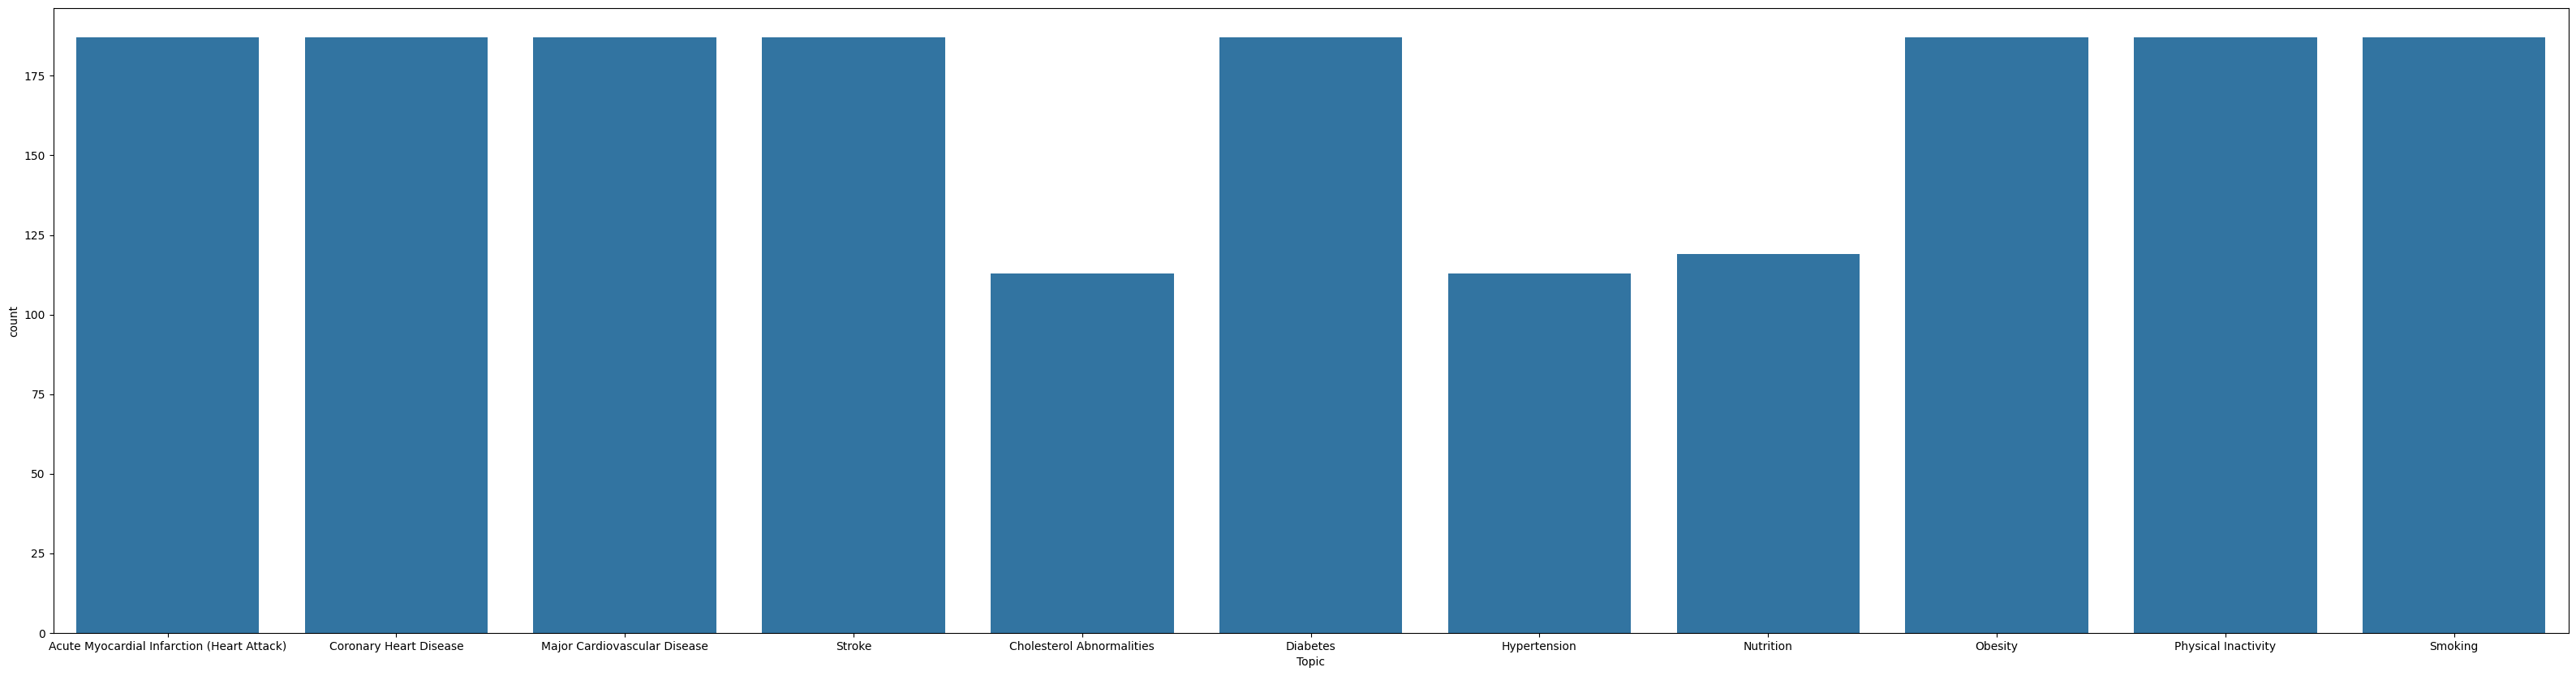

In [18]:
plt.figure(figsize=(40,10))
sns.countplot(x="Topic", data = merged)
plt.show()

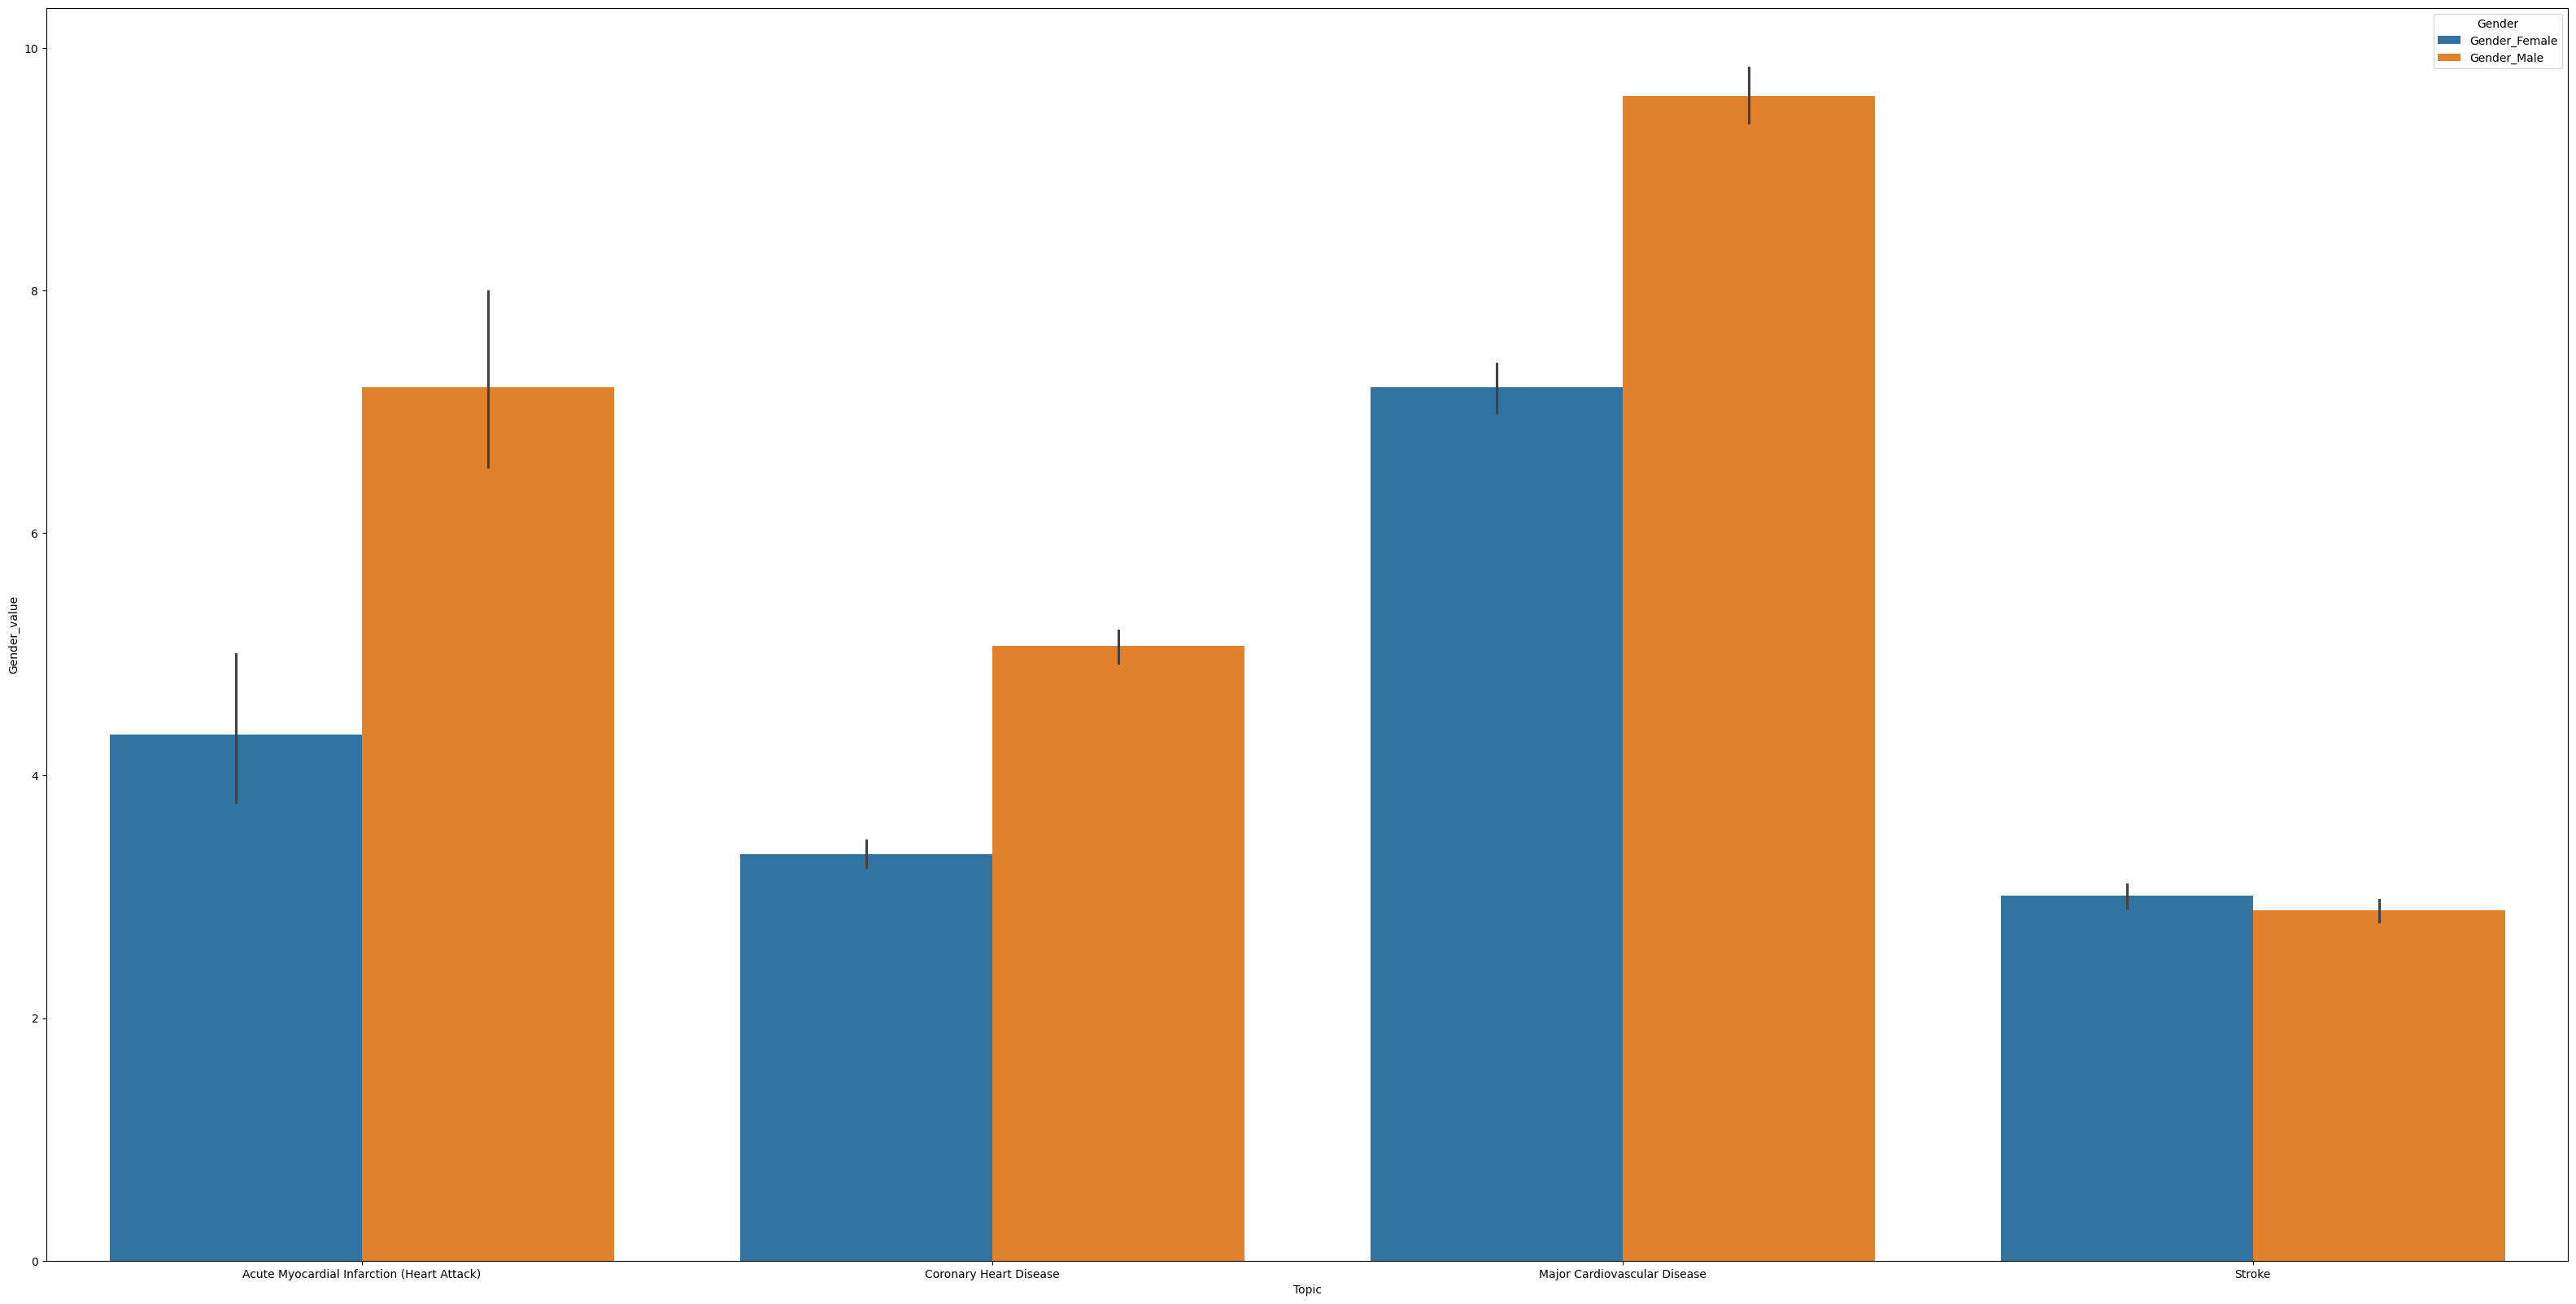

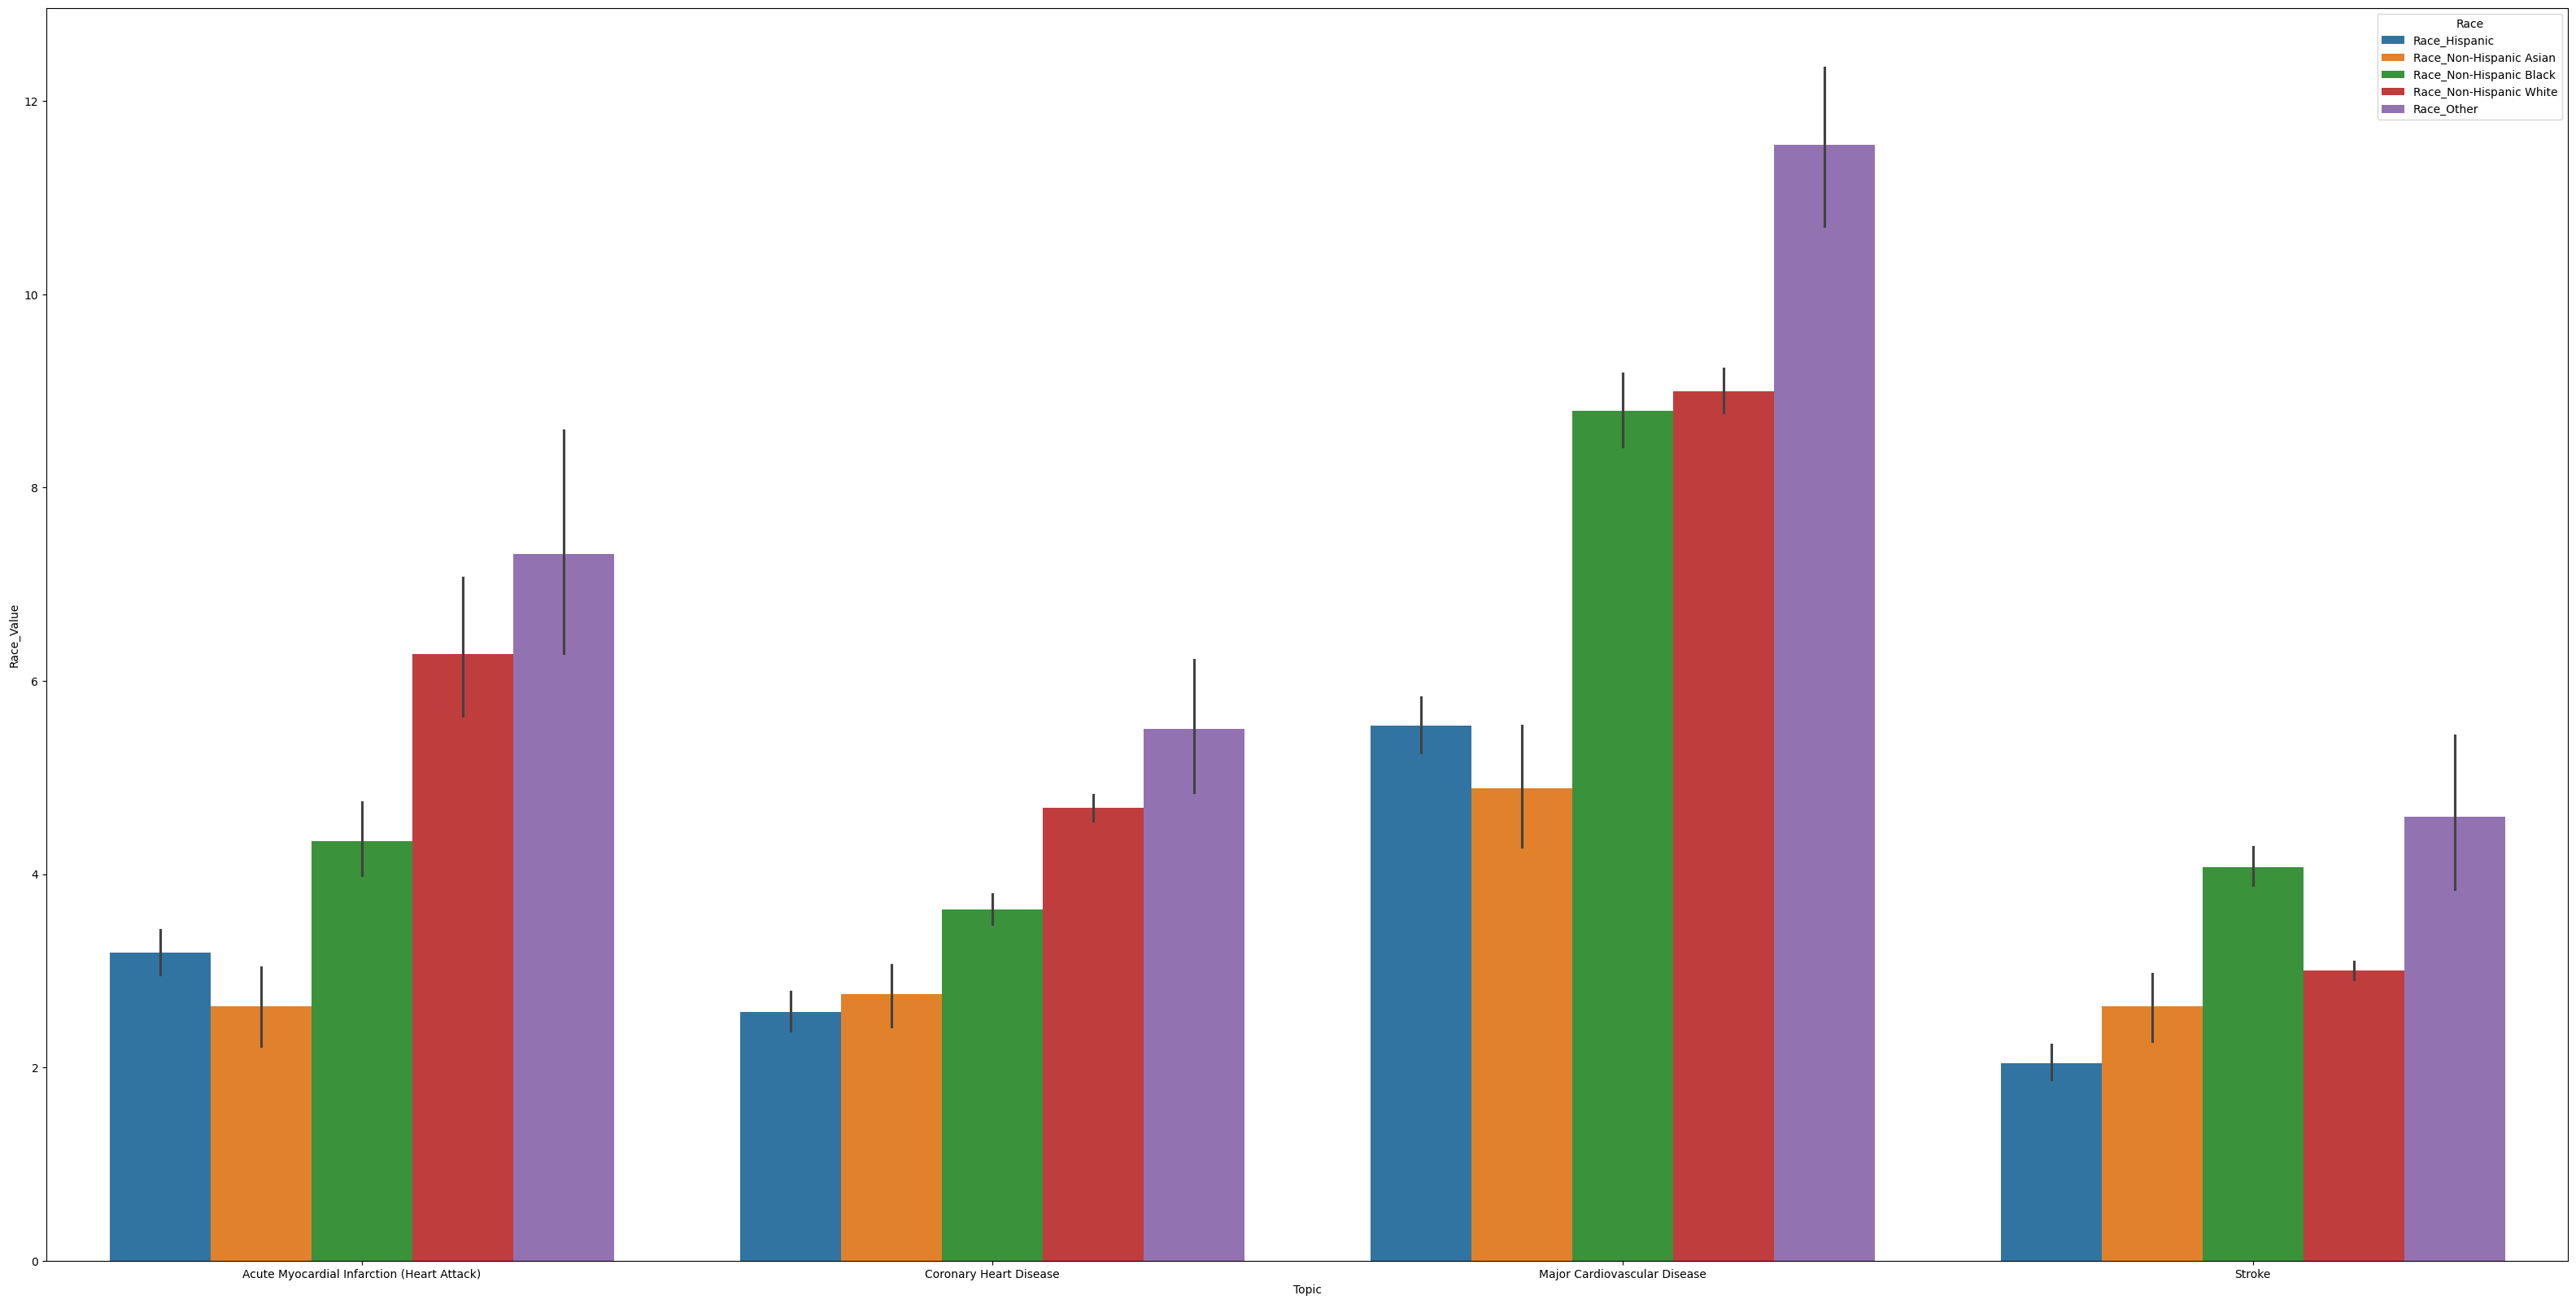

In [19]:
#side-by-side barplot of percentage for each type of disase based on gender.
cvd = merged[merged["Category"] == "Cardiovascular Diseases"]
relevant = cvd[['Topic','Gender_Female','Gender_Male']]


melt = relevant.melt(id_vars=["Topic"], var_name="Gender", value_name="Gender_value")
plt.figure(figsize = (40,20))
sns.barplot(x = "Topic", y = "Gender_value", data = melt , hue =  "Gender")
plt.show()

#side-by-side barplot of percentage for each type of disease based on race.
cvdnew = merged[merged["Category"] == "Cardiovascular Diseases"]
relevantnew = cvdnew[['Topic',"Race_Hispanic", "Race_Non-Hispanic Asian",
            "Race_Non-Hispanic Black", "Race_Non-Hispanic White", "Race_Other"]]


meltnew = relevantnew.melt(id_vars=["Topic"], var_name="Race", value_name="Race_Value")
plt.figure(figsize = (40,20))
sns.barplot(x = "Topic", y = "Race_Value", data = meltnew , hue =  "Race")
plt.show()

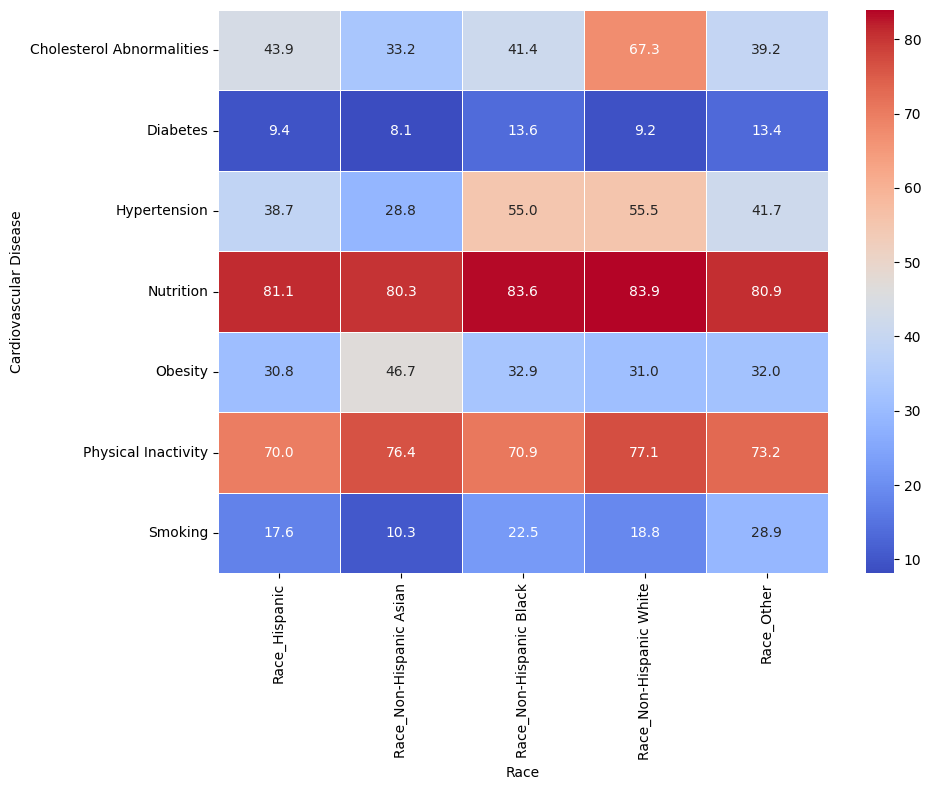

In [20]:
# Heatmap of Risk Factors across different Race Groups

cvd = merged[merged["Category"]== "Risk Factors"]
race = cvd[["Topic", "Race_Hispanic", "Race_Non-Hispanic Asian",
            "Race_Non-Hispanic Black", "Race_Non-Hispanic White", "Race_Other"]]

raceAgg = race.groupby("Topic").mean()


plt.figure(figsize = (10,8))
sns.heatmap(raceAgg, cmap = "coolwarm", annot = True, fmt = ".1f", linewidths = 0.5)

plt.xlabel("Race")
plt.ylabel("Cardiovascular Disease")
plt.tight_layout()

plt.show()


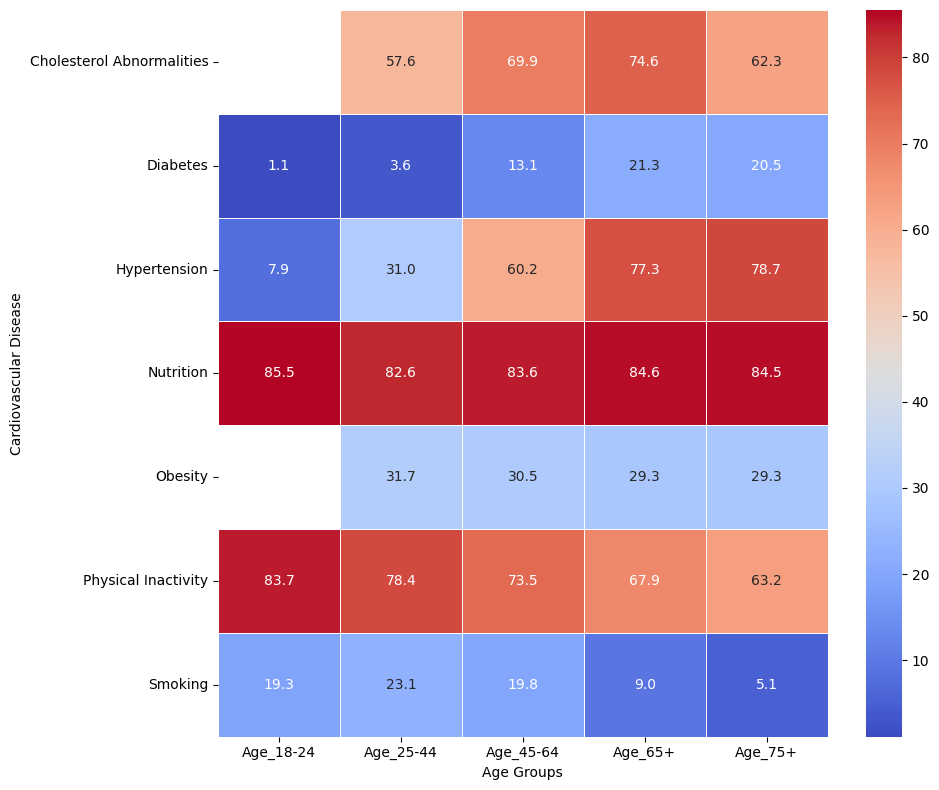

In [21]:
#Heatmap of Risk Factors across different Age Groups

cvd = merged[merged["Category"]== "Risk Factors"]
age = cvd[["Topic", "Age_18-24", "Age_25-44", "Age_45-64", "Age_65+", "Age_75+"]]

ageAgg = age.groupby("Topic").mean()


plt.figure(figsize = (10,8))
sns.heatmap(ageAgg, cmap = "coolwarm", annot = True, fmt = ".1f", linewidths = 0.5)

plt.xlabel("Age Groups")
plt.ylabel("Cardiovascular Disease")
plt.tight_layout()

plt.show()

## Model Building

In [22]:
#importing all neccesary
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


In [23]:
#Pivoting the dataset to become easier for model building.
#Taking every single demographic data, and giving an overall percentage of cardiovascular disease for each risk factor for each state and year. Allows for easier model building. We also got total(overall) percentages
#for race and gender, per state, per year.
merged.describe()
merge_risk = merged[merged["Category"] == "Risk Factors"][["Year", "LocationDesc", "Topic", "Overall_Overall"]]
risk_new = merge_risk.pivot_table(index=["Year", "LocationDesc"],
                                 columns="Topic",
                                 values="Overall_Overall").reset_index()
#Cleaning up column names
risk_new.columns = [col.strip().replace(" ", "_") for col in risk_new.columns]

#printing a sample of pivoted data
print("Pivoted Risk Factor Data:")
print(risk_new.head())

#Combining with disease data
disease_cols = [
    "Year",
    "LocationDesc",
    "Topic",    #Keeps Disease type specifcially.
    "Overall_Overall",  # overall prevalence if needed
    "Age_25-44",
    "Age_45-64",# prevalence in the 45–64 age group
    "Age_65+",# prevalence in the 65+ age group
    "Age_75+",# prevalence in the 75+ age group
    "Gender_Female",
    "Gender_Male",
    "Race_Hispanic",
    "Race_Non-Hispanic White",
    "Race_Non-Hispanic Black",
    "Race_Non-Hispanic Asian",
    "Race_Other"
]
new_disease = merged[merged["Category"] == "Cardiovascular Diseases"][disease_cols].copy()

#Renaming columns
new_disease.rename(columns={"Age_45-64": "Disease_Age45_64"}, inplace=True)
new_disease.rename(columns={"Age_25-44": "Disease_Age25_44"}, inplace=True)
new_disease.rename(columns={"Age_65+": "Disease_Age65+"}, inplace=True)
new_disease.rename(columns={"Age_75+": "Disease_Age75+"}, inplace=True)
new_disease.rename(columns={"Overall_Overall": "OverallPrev", "Topic": "DiseaseType"}, inplace=True)

print("Disease Data Sample:")
print(new_disease.head())

#Merging with CVD Data
merged1 = pd.merge(new_disease, risk_new, on=["Year", "LocationDesc"], how = "inner")

print("Merged Data Sample:")
print(merged1.head(800))

#export to an csv file
merged1.to_csv("data/merged_data_short.csv",index=False)
#downloading the file to my local machine

Pivoted Risk Factor Data:
   Year LocationDesc  Cholesterol_Abnormalities  Diabetes  Hypertension  \
0  2011      Arizona                      67.85       9.5         49.80   
1  2011     Arkansas                      68.20      11.2         58.20   
2  2011   California                      66.30       8.9         49.75   
3  2011     Colorado                      64.35       6.7         47.40   
4  2011  Connecticut                      66.50       9.3         54.45   

   Nutrition  Obesity  Physical_Inactivity  Smoking  
0       78.5    29.50                 75.8     19.1  
1       86.4    31.75                 69.1     26.9  
2       75.6    30.50                 80.9     13.6  
3       80.8    31.05                 83.5     18.3  
4       79.1    31.10                 74.7     17.2  
Disease Data Sample:
    Year LocationDesc                                 DiseaseType  \
22  2011      Arizona  Acute Myocardial Infarction (Heart Attack)   
23  2011      Arizona                   

In [47]:
#I now have two options, since I have too many missing values in some of my columns, I can do a linear regression with inputted dummy values for the missing values,
#or I can create a complex decision tree, specifically using the XGBoost package. I chose XGBoost due to its ability to handle missing values.
#I will create both models, and compare them.

risk_factors = ["Nutrition", "Cholesterol_Abnormalities", "Diabetes", "Hypertension", "Obesity", "Physical_Inactivity", "Smoking"]
demographics = ["Disease_Age25_44", "Disease_Age45_64", "Disease_Age65+", "Disease_Age75+", "Gender_Female",
                "Gender_Male", "Race_Hispanic", "Race_Non-Hispanic White", "Race_Non-Hispanic Black", "Race_Non-Hispanic Asian", "Race_Other"]
texts = risk_factors + demographics
target = "OverallPrev"
imputeCols = texts + [target]

#Creating Linear Regression model with inputed dummy values (mean of each column)
imputes = IterativeImputer(max_iter=10, random_state=42)

# Fit imputer on the subset of data
merged_data = merged1.copy()
merged_data[imputeCols] = imputes.fit_transform(merged1[imputeCols])

#Splitting and Training the data on risk_factos only
X = merged_data[risk_factors]
y = merged_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Fitting the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Evaluate model performance using cross-validation
cv_scores = cross_val_score(lr_model, X, y, cv=5, scoring='neg_mean_squared_error')
print("Average CV MSE (Linear Regression):", -np.mean(cv_scores))

#Predicting y using test data
y_pred = lr_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)
r2 = r2_score(y_test, y_pred)
print("R² value:", r2)
#Getting coefficients
print("Coefficients:")
for feature, coef in zip(risk_factors, lr_model.coef_):
    print(f"  {feature}: {coef:.3f}")

Average CV MSE (Linear Regression): 10.183054936572074
RMSE: 3.2884707939451543
R² value: 0.031324815663193895
Coefficients:
  Nutrition: -0.046
  Cholesterol_Abnormalities: 0.024
  Diabetes: 0.175
  Hypertension: 0.017
  Obesity: 0.113
  Physical_Inactivity: -0.068
  Smoking: 0.140


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [48]:
risk_factors = ["Nutrition", "Cholesterol_Abnormalities", "Diabetes", "Hypertension", "Obesity", "Physical_Inactivity", "Smoking"]
demographics = ["Disease_Age25_44", "Disease_Age45_64", "Disease_Age65+", "Disease_Age75+", "Gender_Female",
                "Gender_Male", "Race_Hispanic", "Race_Non-Hispanic White", "Race_Non-Hispanic Black", "Race_Non-Hispanic Asian", "Race_Other"]
texts = risk_factors + demographics
target = "OverallPrev"
imputeCols = texts + [target]

#Creating Linear Regression model with inputed dummy values (mean of each column)
imputes = IterativeImputer(max_iter=10, random_state=42)

# Fit imputer on the subset of data
merged_data = merged1.copy()
merged_data[imputeCols] = imputes.fit_transform(merged1[imputeCols])

#Splitting and Training the data on risk_factos only
X = merged_data[demographics]
y = merged_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Fitting the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Evaluate model performance using cross-validation
cv_scores = cross_val_score(lr_model, X, y, cv=5, scoring='neg_mean_squared_error')
print("Average CV MSE (Linear Regression):", -np.mean(cv_scores))

#Predicting y using test data
y_pred = lr_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)
r2 = r2_score(y_test, y_pred)
print("R² value:", r2)
#Getting coefficients
print("Coefficients:")
for feature, coef in zip(demographics, lr_model.coef_):
    print(f"  {feature}: {coef:.3f}")

Average CV MSE (Linear Regression): 0.020256833266854367
RMSE: 0.08454027947255516
R² value: 0.9993597972221234
Coefficients:
  Disease_Age25_44: -0.132
  Disease_Age45_64: 0.008
  Disease_Age65+: -0.018
  Disease_Age75+: 0.010
  Gender_Female: 0.485
  Gender_Male: 0.531
  Race_Hispanic: -0.047
  Race_Non-Hispanic White: 0.032
  Race_Non-Hispanic Black: 0.014
  Race_Non-Hispanic Asian: -0.009
  Race_Other: -0.000


/usr/local/lib/python3.11/dist-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


RMSE: 3.8213476213267934
XGBoost Test R²: 0.3080468186208831
XGBoost Feature Importances:
                     Feature  Importance
6                    Smoking    0.200817
2                   Diabetes    0.191866
3               Hypertension    0.156049
5        Physical_Inactivity    0.139037
4                    Obesity    0.133447
1  Cholesterol_Abnormalities    0.102487
0                  Nutrition    0.076295


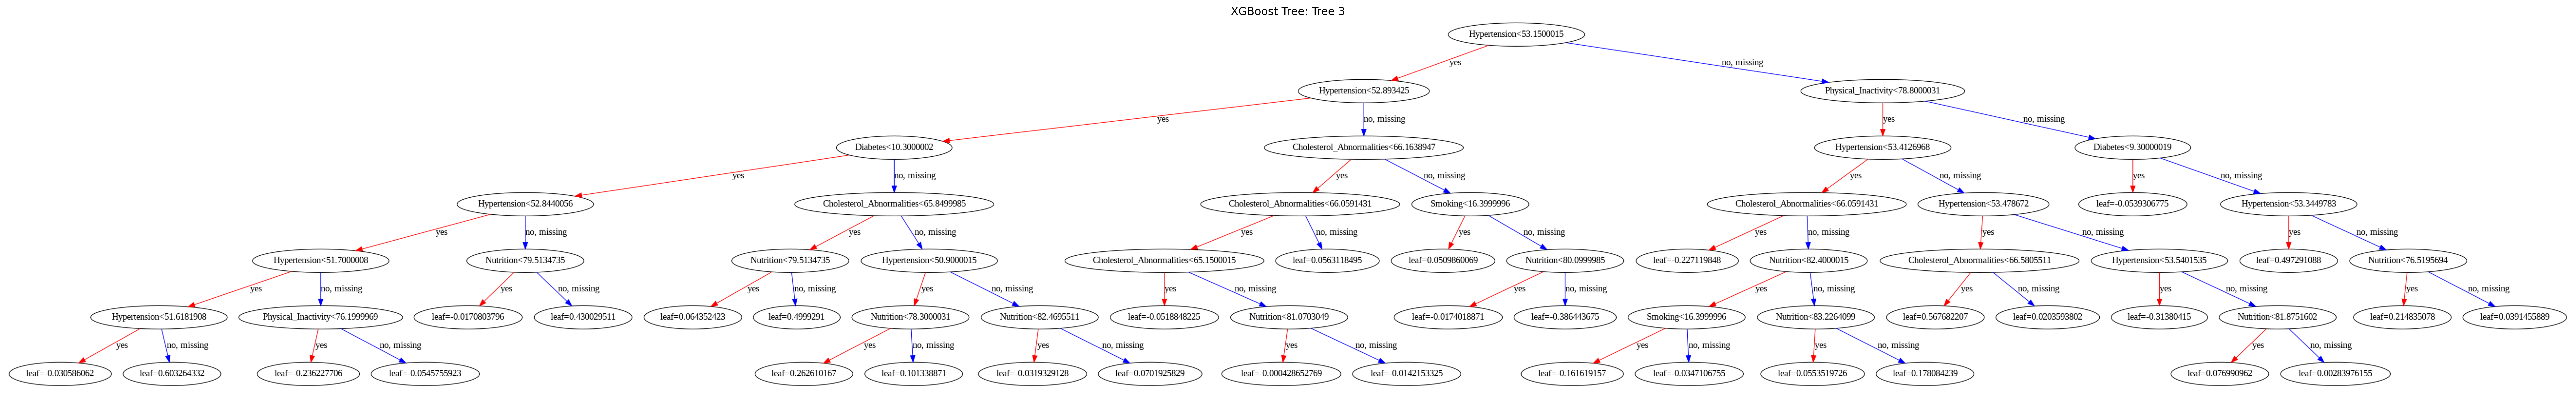

In [54]:
#Now I will be using a decision tree model, specifically using XGBoost, which utilized gradient boosting to create the strongest tree.
#First using risk factors as the only predictors
import xgboost as xgb
X = merged_data[risk_factors]
y = merged_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBRegressor(n_estimators = 100, max_depth = 6, random_state=42, missing = np.nan)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

r2_test = -r2_score(y_test, y_pred)
print("XGBoost Test R²:", r2_test)
# Feature importance
importances = xgb_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': risk_factors, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("XGBoost Feature Importances:")
print(feature_importance)


# Visualize the first tree (tree index = 0) from the model
fig, ax = plt.subplots(figsize=(50, 50), dpi=300)
xgb.plot_tree(xgb_model, num_trees=10, ax=ax)
ax.set_title("XGBoost Tree: Tree 3")
plt.show()

RMSE: 0.18321223674984755
XGBoost Test R²: -0.996993237330939
XGBoost Feature Importances:
                    Feature  Importance
7   Race_Non-Hispanic White    0.692117
5               Gender_Male    0.207572
4             Gender_Female    0.090372
1          Disease_Age45_64    0.008708
2            Disease_Age65+    0.000549
6             Race_Hispanic    0.000161
0          Disease_Age25_44    0.000137
8   Race_Non-Hispanic Black    0.000115
9   Race_Non-Hispanic Asian    0.000111
10               Race_Other    0.000089
3            Disease_Age75+    0.000069


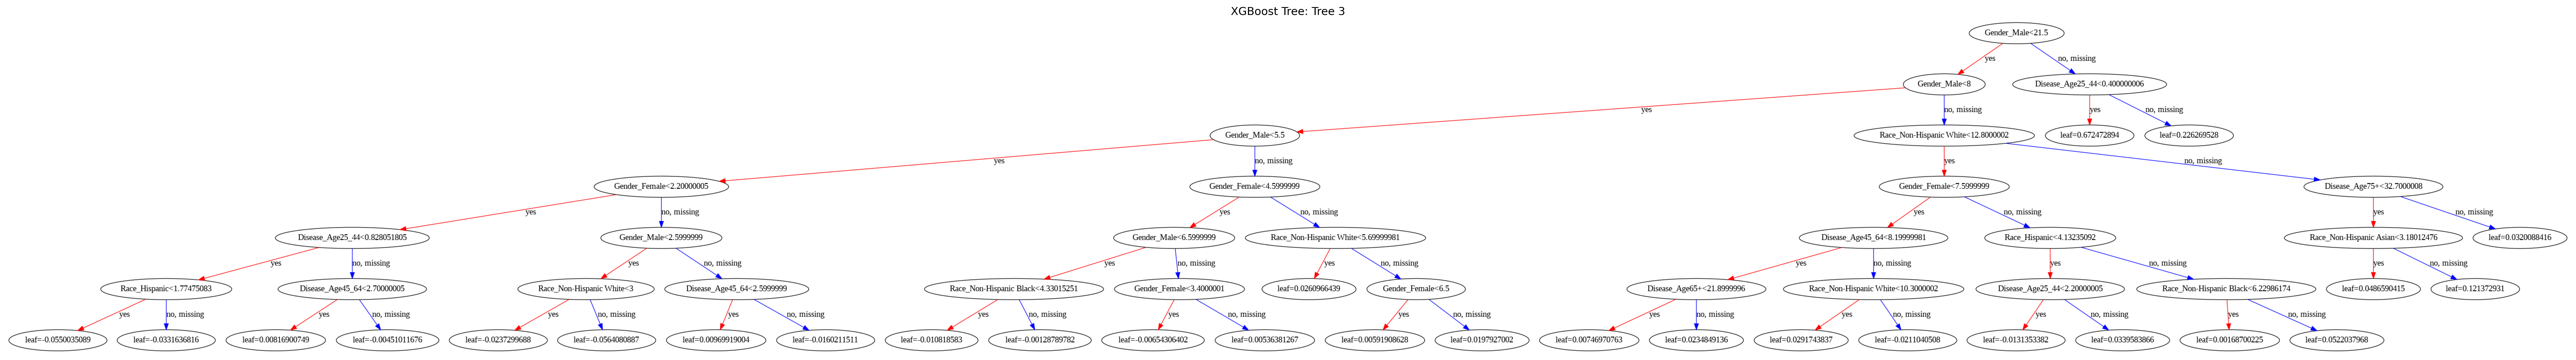

In [49]:
#Now I will be using a decision tree model, specifically using XGBoost, which utilized gradient boosting to create the strongest tree.
#Next using demographics as the only predictors
X = merged_data[demographics]
y = merged_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBRegressor(n_estimators = 100, random_state=42, missing = np.nan)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

r2_test = -r2_score(y_test, y_pred)
print("XGBoost Test R²:", r2_test)
# Feature importance
importances = xgb_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': demographics, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print("XGBoost Feature Importances:")
print(feature_importance)


# Visualize the first tree (tree index = 0) from the model
fig, ax = plt.subplots(figsize=(50, 50), dpi=300)
xgb.plot_tree(xgb_model, num_trees=10, ax=ax)
ax.set_title("XGBoost Tree: Tree 3")
plt.show()